# NYC Yellow Taxi Trip Data Analysis
## Exploratory Data Analysis for Taxi Operations Optimization

This notebook performs comprehensive exploratory data analysis on the NYC Yellow Taxi Trip Data from March 2016. The analysis focuses on understanding trip patterns, demand fluctuations, and data quality to inform optimization strategies for reducing passenger wait times and improving driver efficiency.

**Dataset:** NYC Yellow Taxi Trip Data (March 2016)  
**Size:** ~1.78GB with over 10 million records  
**Source:** NYC Taxi & Limousine Commission (TLC)

### Analysis Objectives:
1. **Data Loading & Preprocessing:** Efficiently load and inspect the large dataset
2. **Summary Statistics:** Understand key trip characteristics and distributions
3. **Temporal Analysis:** Identify peak demand patterns by hour of day
4. **Distance Analysis:** Examine trip distance distributions and patterns
5. **Data Quality Assessment:** Identify missing values, outliers, and data issues

## 1. Import Required Libraries and Setup

In [2]:
# Import essential libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# For large dataset processing (if needed)
try:
    import dask.dataframe as dd
    dask_available = True
    print("Dask is available for large dataset processing")
except ImportError:
    dask_available = False
    print("Dask not available - will use Pandas for data loading")

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Set figure size defaults
plt.rcParams['figure.figsize'] = (12, 8)

print("All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

Dask is available for large dataset processing
All libraries imported successfully!
Pandas version: 2.2.2
NumPy version: 1.26.4
Matplotlib version: 3.9.2
Seaborn version: 0.13.2


## 2. Load NYC Yellow Taxi Trip Data

Loading the NYC Yellow Taxi Trip Data from March 2016. Given the large size (~1.78GB), we'll start with a sample for initial exploration and provide options for full dataset loading using Dask if needed.

In [25]:
# File path for the NYC Yellow Taxi data
file_path = 'yellow_tripdata_2016-03.csv'

# Option 1: Load a sample of the data for initial exploration (recommended for memory efficiency)
def load_sample_data(file_path, sample_size=100000):
    """Load a sample of the taxi data for initial analysis"""
    try:
        print(f"Loading sample of {sample_size:,} records from {file_path}...")
        # Load first chunk to understand the structure
        sample_df = pd.read_csv(file_path, nrows=sample_size)
        print(f"Sample data loaded successfully!")
        print(f"Sample shape: {sample_df.shape}")
        return sample_df
    except FileNotFoundError:
        print(f"Error: Could not find file '{file_path}'")
        print("Please ensure the file is in the current directory")
        return None
    except Exception as e:
        print(f"Error loading data: {str(e)}")
        return None

# Option 2: Load full dataset using Dask (for complete analysis)
def load_full_data_dask(file_path):
    """Load the full dataset using Dask for large data processing"""
    if not dask_available:
        print("Dask not available. Please install dask for full dataset processing.")
        return None
    
    try:
        print(f"Loading full dataset using Dask from {file_path}...")
        # Load with Dask for large dataset processing
        dask_df = dd.read_csv(file_path)
        print(f"Full dataset loaded with Dask!")
        print(f"Dataset partitions: {dask_df.npartitions}")
        return dask_df
    except Exception as e:
        print(f"Error loading full data with Dask: {str(e)}")
        return None

# Option 3: Load full dataset with Pandas (use with caution for large files)
def load_full_data_pandas(file_path):
    """Load the full dataset using Pandas - use only if sufficient memory available"""
    try:
        print(f"Loading full dataset using Pandas from {file_path}...")
        print("Warning: This may consume significant memory (~8-10GB)")
        full_df = pd.read_csv(file_path)
        print(f"Full dataset loaded with Pandas!")
        print(f"Dataset shape: {full_df.shape}")
        return full_df
    except Exception as e:
        print(f"Error loading full data with Pandas: {str(e)}")
        return None

# Load sample data for initial analysis
df = load_full_data_dask(file_path)

if df is not None:
    print("\n" + "="*50)
    print("DATASET OVERVIEW")
    print("="*50)
    
    # Check if it's a Dask DataFrame or Pandas DataFrame
    if isinstance(df, dd.DataFrame):
        print("Dataset type: Dask DataFrame (distributed)")
        print(f"Number of partitions: {df.npartitions}")
        print(f"Number of columns: {len(df.columns)}")
        
        # For Dask, we need to compute operations
        print("Computing dataset statistics...")
        total_rows = df.shape[0].compute()
        print(f"Total rows: {total_rows:,}")
        print(f"Dataset shape: ({total_rows:,}, {len(df.columns)})")
        
        # Compute date range (this may take a moment for large datasets)
        print("Computing date range...")
        min_date = df['tpep_pickup_datetime'].min().compute()
        max_date = df['tpep_pickup_datetime'].max().compute()
        print(f"Date range: {min_date} to {max_date}")
        
        # Memory usage estimation for Dask
        print("Note: Memory usage computed on-demand for Dask DataFrames")
        
    else:
        print("Dataset type: Pandas DataFrame")
        print(f"Dataset shape: {df.shape}")
        print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        print(f"Date range: {df['tpep_pickup_datetime'].min()} to {df['tpep_pickup_datetime'].max()}")
else:
    print("Failed to load data. Please check the file path and try again.")

Loading full dataset using Dask from yellow_tripdata_2016-03.csv...
Full dataset loaded with Dask!
Dataset partitions: 29

DATASET OVERVIEW
Dataset type: Dask DataFrame (distributed)
Number of partitions: 29
Number of columns: 19
Computing dataset statistics...
Total rows: 12,210,952
Dataset shape: (12,210,952, 19)
Computing date range...
Total rows: 12,210,952
Dataset shape: (12,210,952, 19)
Computing date range...
Date range: 2016-03-01 00:00:00 to 2016-03-31 23:59:59
Note: Memory usage computed on-demand for Dask DataFrames
Date range: 2016-03-01 00:00:00 to 2016-03-31 23:59:59
Note: Memory usage computed on-demand for Dask DataFrames


In [26]:
# Display basic information about the dataset
if df is not None:
    print("COLUMN INFORMATION")
    print("="*50)
    print(f"Number of columns: {len(df.columns)}")
    print(f"Column names: {list(df.columns)}")
    
    print("\nDATA TYPES")
    print("="*30)
    print(df.dtypes)
    
    print("\nFIRST 5 ROWS")
    print("="*30)
    
    # Handle head() for both Dask and Pandas
    if isinstance(df, dd.DataFrame):
        display(df.head())  # Dask head() already returns a computed DataFrame
    else:
        display(df.head())
    
    print("\nBASIC INFO")
    print("="*30)
    
    # Handle info() for both Dask and Pandas
    if isinstance(df, dd.DataFrame):
        print("Dask DataFrame - Column info:")
        for col in df.columns:
            dtype = df[col].dtype
            print(f"{col}: {dtype}")
        print(f"\nTotal partitions: {df.npartitions}")
    else:
        df.info()

COLUMN INFORMATION
Number of columns: 19
Column names: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']

DATA TYPES
VendorID                           int64
tpep_pickup_datetime     string[pyarrow]
tpep_dropoff_datetime    string[pyarrow]
passenger_count                    int64
trip_distance                    float64
pickup_longitude                 float64
pickup_latitude                  float64
RatecodeID                         int64
store_and_fwd_flag       string[pyarrow]
dropoff_longitude                float64
dropoff_latitude                 float64
payment_type                       int64
fare_amount                      float64
extra                            float64
mta_tax                

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80



BASIC INFO
Dask DataFrame - Column info:
VendorID: int64
tpep_pickup_datetime: string
tpep_dropoff_datetime: string
passenger_count: int64
trip_distance: float64
pickup_longitude: float64
pickup_latitude: float64
RatecodeID: int64
store_and_fwd_flag: string
dropoff_longitude: float64
dropoff_latitude: float64
payment_type: int64
fare_amount: float64
extra: float64
mta_tax: float64
tip_amount: float64
tolls_amount: float64
improvement_surcharge: float64
total_amount: float64

Total partitions: 29


## 3. Calculate Summary Statistics

Calculate comprehensive summary statistics for key numerical columns: `trip_distance`, `fare_amount`, and `passenger_count`. These statistics will help us understand the central tendencies, variability, and distributions of critical trip characteristics.

In [28]:
# Calculate summary statistics for key columns
if df is not None:
    print("SUMMARY STATISTICS FOR KEY COLUMNS")
    print("="*60)
    
    # Key columns for analysis
    key_columns = ['trip_distance', 'fare_amount', 'passenger_count']
    
    # Check if columns exist in the dataset
    available_columns = [col for col in key_columns if col in df.columns]
    missing_columns = [col for col in key_columns if col not in df.columns]
    
    if missing_columns:
        print(f"Warning: The following expected columns are missing: {missing_columns}")
        print(f"Available columns for analysis: {available_columns}")
    
    if available_columns:
        # Calculate detailed statistics
        print("\nDetailed Summary Statistics:")
        if isinstance(df, dd.DataFrame):
            summary_stats = df[available_columns].describe().compute()
        else:
            summary_stats = df[available_columns].describe()
        print(summary_stats)
        
        # Additional statistics
        print("\nADDITIONAL STATISTICS")
        print("-" * 40)
        
        for col in available_columns:
            print(f"\n{col.upper()}:")
            
            # Handle Dask vs Pandas operations
            if isinstance(df, dd.DataFrame):
                mean_val = df[col].mean().compute()
                # Use approximate median for Dask
                try:
                    median_val = df[col].median_approximate().compute()
                    median_note = " (approximate)"
                except:
                    median_val = "N/A"
                    median_note = " (unavailable)"
                
                std_val = df[col].std().compute()
                var_val = df[col].var().compute()
                min_val = df[col].min().compute()
                max_val = df[col].max().compute()
                
                # Quantiles work fine in Dask
                try:
                    q25_val = df[col].quantile(0.25).compute()
                    q75_val = df[col].quantile(0.75).compute()
                except:
                    q25_val = "N/A"
                    q75_val = "N/A"
                
                print(f"  Mean: {mean_val:.4f}")
                if median_val != "N/A":
                    print(f"  Median: {median_val:.4f}{median_note}")
                else:
                    print(f"  Median: {median_val}")
                print("  Mode: Not available for distributed datasets")
                print(f"  Standard Deviation: {std_val:.4f}")
                print(f"  Variance: {var_val:.4f}")
                print("  Skewness: Not available for distributed datasets")
                print("  Kurtosis: Not available for distributed datasets")
                print(f"  Min: {min_val:.4f}")
                print(f"  Max: {max_val:.4f}")
                print(f"  Range: {max_val - min_val:.4f}")
                if q25_val != "N/A" and q75_val != "N/A":
                    print(f"  IQR: {q75_val - q25_val:.4f}")
                else:
                    print("  IQR: N/A")
                
            else:
                print(f"  Mean: {df[col].mean():.4f}")
                print(f"  Median: {df[col].median():.4f}")
                print(f"  Mode: {df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'}")
                print(f"  Standard Deviation: {df[col].std():.4f}")
                print(f"  Variance: {df[col].var():.4f}")
                print(f"  Skewness: {df[col].skew():.4f}")
                print(f"  Kurtosis: {df[col].kurtosis():.4f}")
                print(f"  Min: {df[col].min():.4f}")
                print(f"  Max: {df[col].max():.4f}")
                print(f"  Range: {df[col].max() - df[col].min():.4f}")
                print(f"  IQR: {df[col].quantile(0.75) - df[col].quantile(0.25):.4f}")
            
        # Correlation matrix for numerical columns
        print("\nCORRELATION MATRIX")
        print("-" * 30)
        if isinstance(df, dd.DataFrame):
            correlation_matrix = df[available_columns].corr().compute()
        else:
            correlation_matrix = df[available_columns].corr()
        print(correlation_matrix)
        
        # Create a more comprehensive statistics DataFrame
        print("\nCOMPREHENSIVE STATISTICS SUMMARY")
        print("-" * 50)
        
        if isinstance(df, dd.DataFrame):
            # For Dask, compute statistics efficiently with supported operations
            median_values = []
            q25_values = []
            q75_values = []
            
            for col in available_columns:
                try:
                    median_val = df[col].median_approximate().compute()
                except:
                    median_val = np.nan
                median_values.append(median_val)
                
                try:
                    q25_val = df[col].quantile(0.25).compute()
                    q75_val = df[col].quantile(0.75).compute()
                except:
                    q25_val = np.nan
                    q75_val = np.nan
                q25_values.append(q25_val)
                q75_values.append(q75_val)
            
            comprehensive_stats = pd.DataFrame({
                'Column': available_columns,
                'Count': [df[col].count().compute() for col in available_columns],
                'Mean': [df[col].mean().compute() for col in available_columns],
                'Median_Approx': median_values,
                'Std': [df[col].std().compute() for col in available_columns],
                'Min': [df[col].min().compute() for col in available_columns],
                'Max': [df[col].max().compute() for col in available_columns],
                'Q25': q25_values,
                'Q75': q75_values
            })
        else:
            comprehensive_stats = pd.DataFrame({
                'Column': available_columns,
                'Count': [df[col].count() for col in available_columns],
                'Mean': [df[col].mean() for col in available_columns],
                'Median': [df[col].median() for col in available_columns],
                'Std': [df[col].std() for col in available_columns],
                'Min': [df[col].min() for col in available_columns],
                'Max': [df[col].max() for col in available_columns],
                'Q25': [df[col].quantile(0.25) for col in available_columns],
                'Q75': [df[col].quantile(0.75) for col in available_columns],
                'Skewness': [df[col].skew() for col in available_columns],
                'Kurtosis': [df[col].kurtosis() for col in available_columns]
            })
        
        display(comprehensive_stats.round(4))
    
    else:
        print("No valid numerical columns found for analysis")
        print("Available columns in dataset:", df.columns.tolist())

SUMMARY STATISTICS FOR KEY COLUMNS

Detailed Summary Statistics:
       trip_distance   fare_amount  passenger_count
count   1.221095e+07  1.221095e+07     1.221095e+07
mean    6.131770e+00  1.279508e+01     1.659580e+00
std     6.156483e+03  1.340979e+02     1.312189e+00
min     0.000000e+00 -3.760000e+02     0.000000e+00
25%     1.100000e+00  7.000000e+00     1.000000e+00
50%     1.870000e+00  1.000000e+01     1.000000e+00
75%     3.500000e+00  1.550000e+01     2.000000e+00
max     1.907263e+07  4.294967e+05     9.000000e+00

ADDITIONAL STATISTICS
----------------------------------------

TRIP_DISTANCE:
  Mean: 6.1318
  Median: 1.8700 (approximate)
  Mode: Not available for distributed datasets
  Standard Deviation: 6156.4826
  Variance: 37902278.5544
  Skewness: Not available for distributed datasets
  Kurtosis: Not available for distributed datasets
  Min: 0.0000
  Max: 19072628.8000
  Range: 19072628.8000
  IQR: 2.4000

FARE_AMOUNT:
  Mean: 12.7951
  Median: 10.0000 (approximate)


,Column,Count,Mean,Median_Approx,Std,Min,Max,Q25,Q75
0,trip_distance,12210952,6.1318,1.87,6156.4826,0.0,19072628.80,1.1,3.5
1,fare_amount,12210952,12.7951,10.00,134.0979,-376.0,429496.72,7.0,15.5
2,passenger_count,12210952,1.6596,1.00,1.3122,0.0,9.00,1.0,2.0


## 4. Generate Time-Series Plot of Trips by Hour

Analyze temporal patterns in taxi demand by creating a time-series plot showing the number of trips by hour of the day. This analysis will help identify peak demand periods and inform optimization strategies for taxi operations.

PROCESSING TEMPORAL DATA
Converting pickup datetime for Dask DataFrame...
Computing date range...
Date range: 2016-03-01 00:00:00 to 2016-03-31 23:59:59
Total days in sample: 31

TRIPS BY HOUR OF DAY
------------------------------
    pickup_hour  trip_count
0             3      168891
1             5      125850
2             7      469016
3             8      572589
4            10      548959
5            21      717258
6             0      430181
7            12      589626
8            13      590731
9            16      546348
10           18      768901
11           19      772373
12           20      729157
13            1      308481
14            2      208287
15            4      129206
16            6      277121
17            9      571619
18           11      561845
19           14      617428
20           15      600440
21           17      650338
22           22      675310
23           23      580997


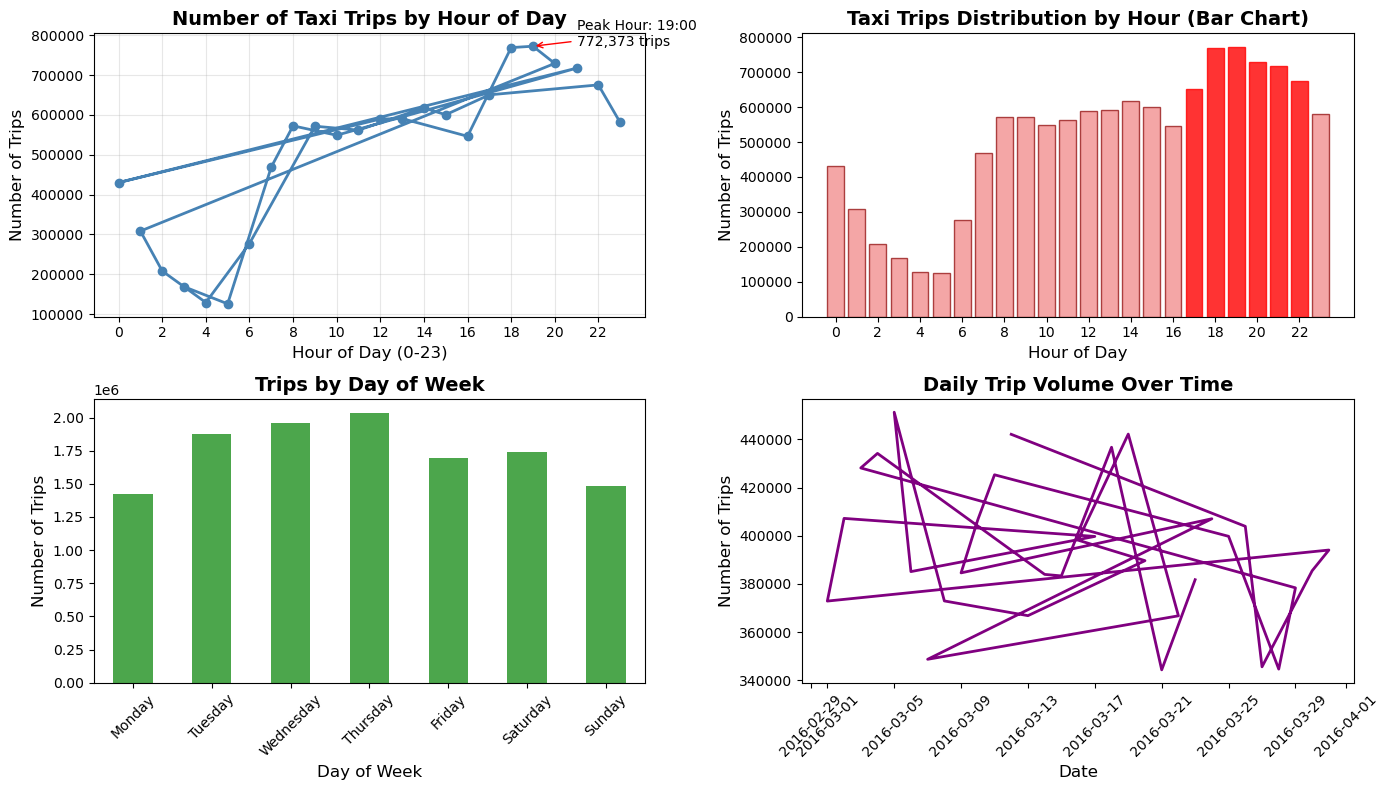


TEMPORAL PATTERN ANALYSIS
Peak hour: 19:00 with 772,373 trips
Lowest hour: 5:00 with 125,850 trips
Average trips per hour: 508790
Rush hour ratio (peak/average): 1.52
Rush hours (>20% above average): [21, 18, 19, 20, 14, 17, 22]


In [33]:
# Time-series analysis: Trips by hour of day
if df is not None:
    # Check if the datetime column exists
    datetime_col = 'tpep_pickup_datetime'
    
    if datetime_col in df.columns:
        print("PROCESSING TEMPORAL DATA")
        print("="*40)
        
        # Handle datetime conversion for both Dask and Pandas
        if isinstance(df, dd.DataFrame):
            print("Converting pickup datetime for Dask DataFrame...")
            # For Dask, use dd.to_datetime
            df_temporal = df.assign(**{
                datetime_col: dd.to_datetime(df[datetime_col])
            })
            
            # Extract temporal features using Dask operations
            df_temporal = df_temporal.assign(
                pickup_hour=df_temporal[datetime_col].dt.hour,
                pickup_day=df_temporal[datetime_col].dt.day,
                pickup_weekday=df_temporal[datetime_col].dt.day_name(),
                pickup_date=df_temporal[datetime_col].dt.date
            )
            
            print("Computing date range...")
            min_date = df_temporal[datetime_col].min().compute()
            max_date = df_temporal[datetime_col].max().compute()
            total_days = df_temporal['pickup_date'].nunique().compute()
            
        else:
            print("Converting pickup datetime for Pandas DataFrame...")
            # For Pandas, direct assignment works
            df[datetime_col] = pd.to_datetime(df[datetime_col])
            df['pickup_hour'] = df[datetime_col].dt.hour
            df['pickup_day'] = df[datetime_col].dt.day
            df['pickup_weekday'] = df[datetime_col].dt.day_name()
            df['pickup_date'] = df[datetime_col].dt.date
            
            df_temporal = df
            min_date = df[datetime_col].min()
            max_date = df[datetime_col].max()
            total_days = df['pickup_date'].nunique()
        
        print(f"Date range: {min_date} to {max_date}")
        print(f"Total days in sample: {total_days}")
        
        # Group by hour and count trips
        if isinstance(df_temporal, dd.DataFrame):
            # For Dask, we need to handle the groupby differently
            hourly_counts = df_temporal.groupby('pickup_hour').size().compute()
            hourly_trips = hourly_counts.reset_index(name='trip_count')
        else:
            hourly_trips = df_temporal.groupby('pickup_hour').size().reset_index(name='trip_count')
        
        print("\nTRIPS BY HOUR OF DAY")
        print("-" * 30)
        print(hourly_trips)
        
        # Create the time-series plot
        plt.figure(figsize=(14, 8))
        
        # Main hourly pattern plot
        plt.subplot(2, 2, 1)
        plt.plot(hourly_trips['pickup_hour'], hourly_trips['trip_count'], 
                marker='o', linewidth=2, markersize=6, color='steelblue')
        plt.title('Number of Taxi Trips by Hour of Day', fontsize=14, fontweight='bold')
        plt.xlabel('Hour of Day (0-23)', fontsize=12)
        plt.ylabel('Number of Trips', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.xticks(range(0, 24, 2))
        
        # Add peak hours annotation
        peak_hour = hourly_trips.loc[hourly_trips['trip_count'].idxmax(), 'pickup_hour']
        peak_count = hourly_trips['trip_count'].max()
        plt.annotate(f'Peak Hour: {peak_hour}:00\n{peak_count:,} trips', 
                    xy=(peak_hour, peak_count), xytext=(peak_hour+2, peak_count+500),
                    arrowprops=dict(arrowstyle='->', color='red'),
                    fontsize=10, ha='left')
        
        # Bar chart version
        plt.subplot(2, 2, 2)
        bars = plt.bar(hourly_trips['pickup_hour'], hourly_trips['trip_count'], 
                      color='lightcoral', alpha=0.7, edgecolor='darkred')
        plt.title('Taxi Trips Distribution by Hour (Bar Chart)', fontsize=14, fontweight='bold')
        plt.xlabel('Hour of Day', fontsize=12)
        plt.ylabel('Number of Trips', fontsize=12)
        plt.xticks(range(0, 24, 2))
        
        # Highlight peak hours
        for i, bar in enumerate(bars):
            if hourly_trips.iloc[i]['trip_count'] > hourly_trips['trip_count'].quantile(0.75):
                bar.set_color('red')
                bar.set_alpha(0.8)
        
        # Weekly pattern analysis
        plt.subplot(2, 2, 3)
        if isinstance(df_temporal, dd.DataFrame):
            weekday_trips = df_temporal.groupby('pickup_weekday').size().compute().reindex(
                ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            )
        else:
            weekday_trips = df_temporal.groupby('pickup_weekday').size().reindex(
                ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            )
        weekday_trips.plot(kind='bar', color='green', alpha=0.7)
        plt.title('Trips by Day of Week', fontsize=14, fontweight='bold')
        plt.xlabel('Day of Week', fontsize=12)
        plt.ylabel('Number of Trips', fontsize=12)
        plt.xticks(rotation=45)
        
        # Daily trips over time
        plt.subplot(2, 2, 4)
        if isinstance(df_temporal, dd.DataFrame):
            daily_trips = df_temporal.groupby('pickup_date').size().compute()
        else:
            daily_trips = df_temporal.groupby('pickup_date').size()
        daily_trips.plot(color='purple', linewidth=2)
        plt.title('Daily Trip Volume Over Time', fontsize=14, fontweight='bold')
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Number of Trips', fontsize=12)
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Summary statistics for temporal patterns
        print("\nTEMPORAL PATTERN ANALYSIS")
        print("="*40)
        print(f"Peak hour: {peak_hour}:00 with {peak_count:,} trips")
        print(f"Lowest hour: {hourly_trips.loc[hourly_trips['trip_count'].idxmin(), 'pickup_hour']}:00 "
              f"with {hourly_trips['trip_count'].min():,} trips")
        print(f"Average trips per hour: {hourly_trips['trip_count'].mean():.0f}")
        print(f"Rush hour ratio (peak/average): {peak_count / hourly_trips['trip_count'].mean():.2f}")
        
        # Identify rush hours (hours with trips > 1.2 * average)
        avg_trips = hourly_trips['trip_count'].mean()
        rush_hours = hourly_trips[hourly_trips['trip_count'] > avg_trips * 1.2]['pickup_hour'].tolist()
        print(f"Rush hours (>20% above average): {rush_hours}")
        
    else:
        print(f"Error: Column '{datetime_col}' not found in dataset")
        print(f"Available columns: {df.columns.tolist()}")
else:
    print("No data available for temporal analysis")

## 5. Create Trip Distance Distribution Histogram

Analyze the distribution of trip distances to understand typical taxi usage patterns. This visualization will help identify the most common trip distances and detect any unusual patterns or outliers in the data.

TRIP DISTANCE DISTRIBUTION ANALYSIS
Basic Trip Distance Statistics:
Mean: 6.13 miles
Median: 1.87 miles (approximate)
Standard Deviation: 6156.48 miles
Min: 0.00 miles
Max: 19072628.80 miles

Trip Distance Percentiles:
Mean: 6.13 miles
Median: 1.87 miles (approximate)
Standard Deviation: 6156.48 miles
Min: 0.00 miles
Max: 19072628.80 miles

Trip Distance Percentiles:
10th percentile: 0.70 miles
10th percentile: 0.70 miles
25th percentile: 1.10 miles
25th percentile: 1.10 miles
50th percentile: 1.87 miles
50th percentile: 1.87 miles
75th percentile: 3.50 miles
75th percentile: 3.50 miles
90th percentile: 8.20 miles
90th percentile: 8.20 miles
95th percentile: 12.10 miles
95th percentile: 12.10 miles
99th percentile: 19.30 miles
Computing trip distance data for visualization...
99th percentile: 19.30 miles
Computing trip distance data for visualization...
Using 100K random sample for visualization performance
Using 100K random sample for visualization performance


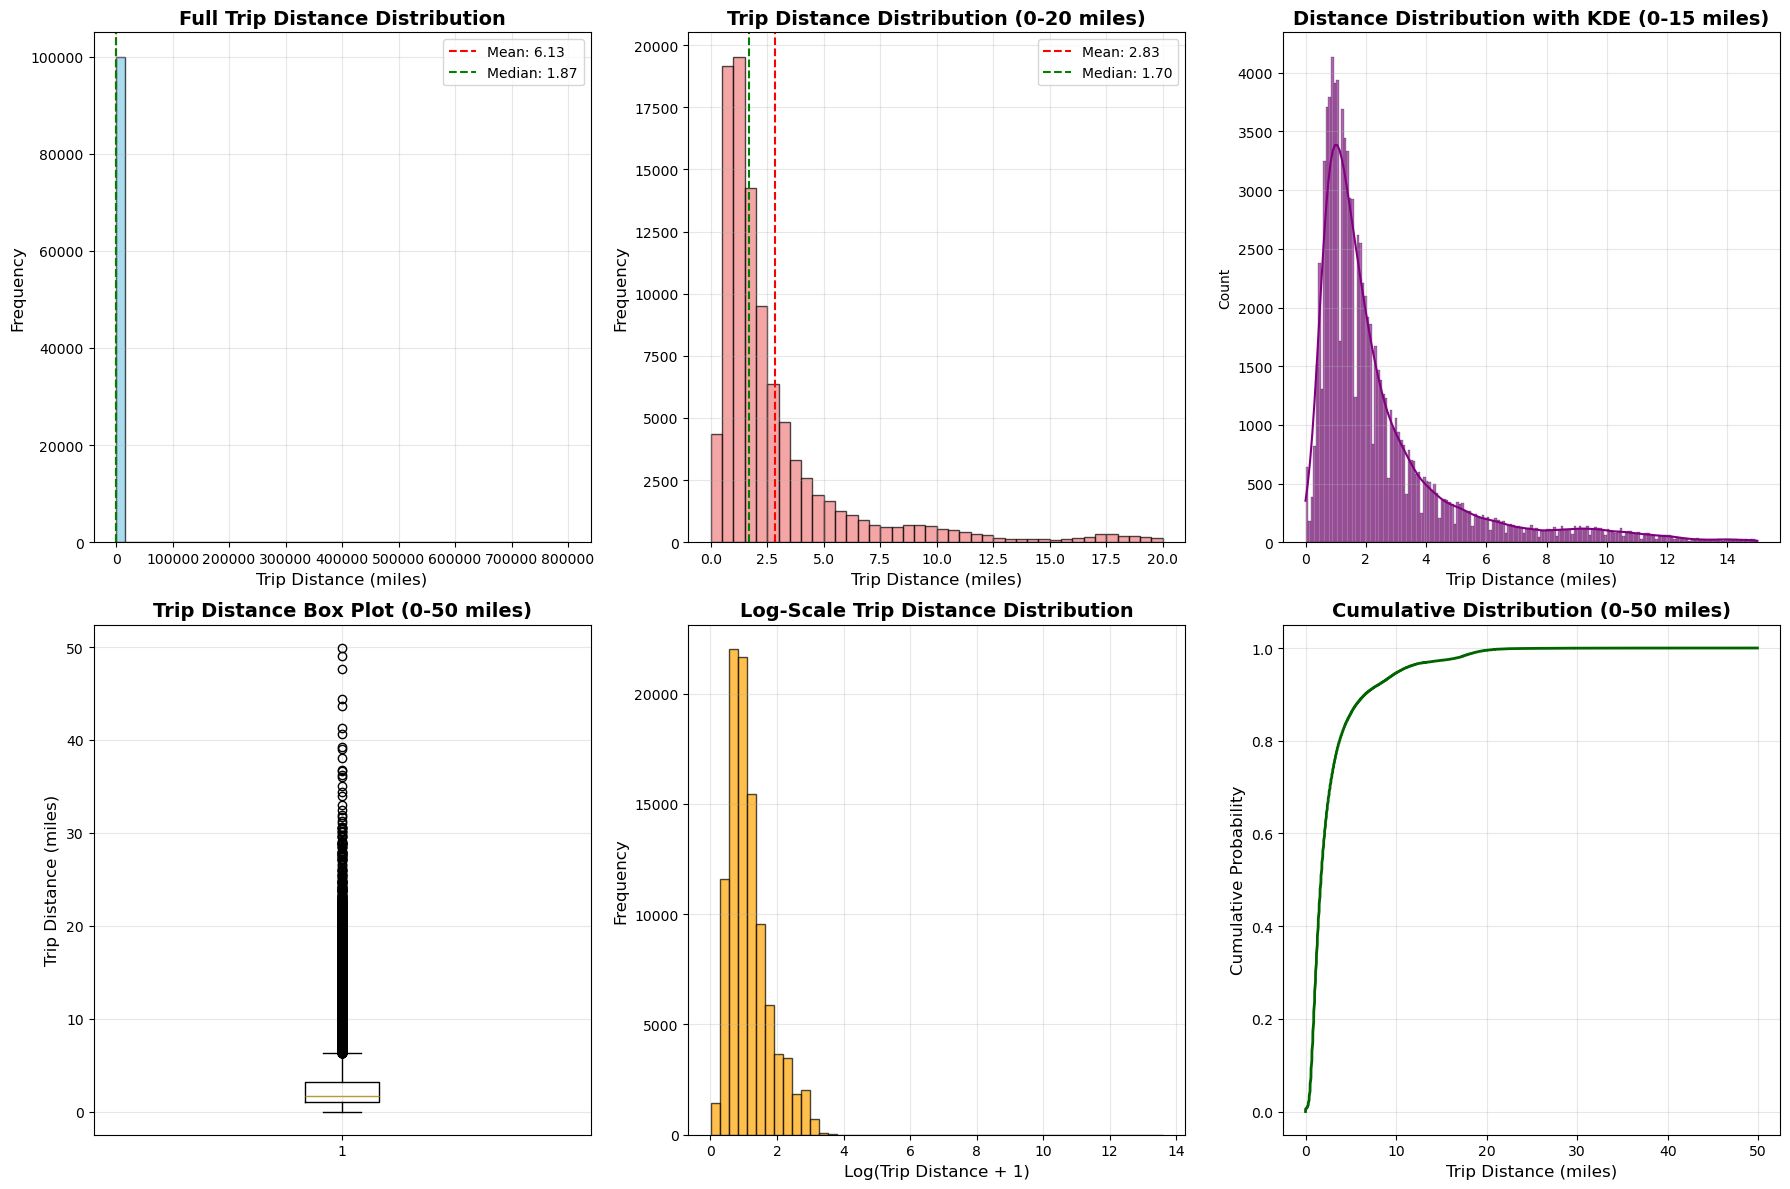


TRIP DISTANCE CATEGORIES
----------------------------------------
Trip count by distance category (based on sample):
Short (1-3 miles): 47,936 trips (47.9%)
Very Short (≤1 mile): 25,832 trips (25.8%)
Medium (3-10 miles): 20,879 trips (20.9%)
Long (10-20 miles): 4,867 trips (4.9%)
Very Long (>20 miles): 486 trips (0.5%)


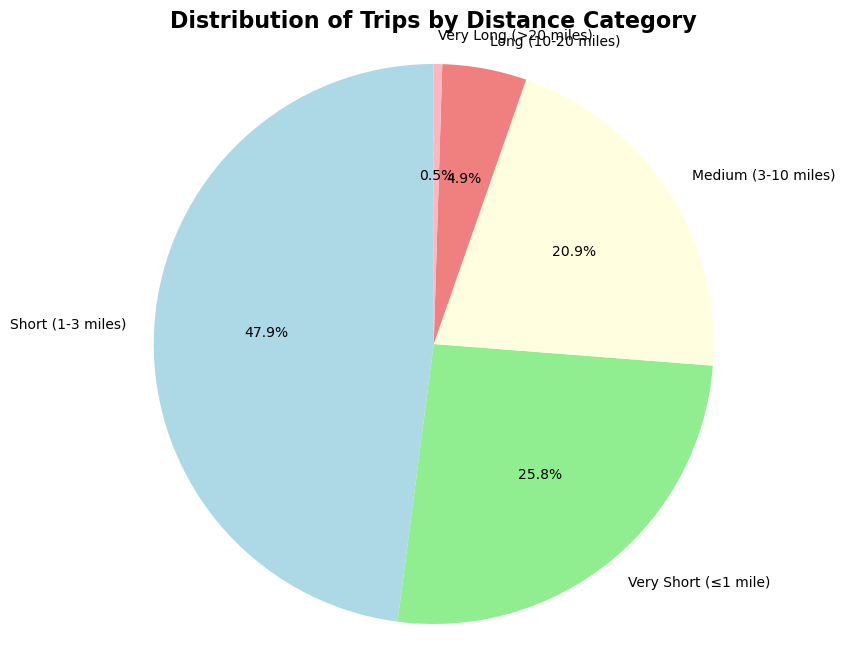


OUTLIER ANALYSIS
------------------------------
Q1: 1.10, Q3: 3.50, IQR: 2.40
Lower bound: -2.50, Upper bound: 7.10
Estimated outliers: 9,102 (9.10% of sample)
Sample outlier range: 7.11 - 800000.20 miles
Q1: 1.10, Q3: 3.50, IQR: 2.40
Lower bound: -2.50, Upper bound: 7.10
Estimated outliers: 9,102 (9.10% of sample)
Sample outlier range: 7.11 - 800000.20 miles


In [36]:
# Analyze trip distance distribution
if df is not None:
    distance_col = 'trip_distance'
    
    if distance_col in df.columns:
        print("TRIP DISTANCE DISTRIBUTION ANALYSIS")
        print("="*50)
        
        # Basic statistics for trip distance
        print("Basic Trip Distance Statistics:")
        
        if isinstance(df, dd.DataFrame):
            # For Dask, compute statistics
            mean_dist = df[distance_col].mean().compute()
            try:
                median_dist = df[distance_col].median_approximate().compute()
                median_note = " (approximate)"
            except:
                median_dist = "N/A"
                median_note = ""
            std_dist = df[distance_col].std().compute()
            min_dist = df[distance_col].min().compute()
            max_dist = df[distance_col].max().compute()
            
            print(f"Mean: {mean_dist:.2f} miles")
            if median_dist != "N/A":
                print(f"Median: {median_dist:.2f} miles{median_note}")
            else:
                print(f"Median: {median_dist}")
            print(f"Standard Deviation: {std_dist:.2f} miles")
            print(f"Min: {min_dist:.2f} miles")
            print(f"Max: {max_dist:.2f} miles")
            
        else:
            # For Pandas, direct operations
            print(f"Mean: {df[distance_col].mean():.2f} miles")
            print(f"Median: {df[distance_col].median():.2f} miles")
            print(f"Standard Deviation: {df[distance_col].std():.2f} miles")
            print(f"Min: {df[distance_col].min():.2f} miles")
            print(f"Max: {df[distance_col].max():.2f} miles")
        
        # Percentile analysis
        percentiles = [10, 25, 50, 75, 90, 95, 99]
        print(f"\nTrip Distance Percentiles:")
        for p in percentiles:
            if isinstance(df, dd.DataFrame):
                try:
                    value = df[distance_col].quantile(p/100).compute()
                    print(f"{p}th percentile: {value:.2f} miles")
                except:
                    print(f"{p}th percentile: Computing...")
            else:
                value = df[distance_col].quantile(p/100)
                print(f"{p}th percentile: {value:.2f} miles")
        
        # Create comprehensive distance distribution visualizations
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # Get data for plotting (compute if Dask)
        if isinstance(df, dd.DataFrame):
            print("Computing trip distance data for visualization...")
            # For large datasets, sample for visualization
            distance_data = df[distance_col].compute()
            if len(distance_data) > 1000000:  # If more than 1M records, sample
                distance_sample = distance_data.sample(n=100000, random_state=42)
                print("Using 100K random sample for visualization performance")
            else:
                distance_sample = distance_data
        else:
            distance_data = df[distance_col]
            distance_sample = distance_data
        
        # 1. Full distribution histogram
        axes[0,0].hist(distance_sample, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0,0].set_title('Full Trip Distance Distribution', fontsize=14, fontweight='bold')
        axes[0,0].set_xlabel('Trip Distance (miles)', fontsize=12)
        axes[0,0].set_ylabel('Frequency', fontsize=12)
        
        if isinstance(df, dd.DataFrame):
            axes[0,0].axvline(mean_dist, color='red', linestyle='--', 
                             label=f'Mean: {mean_dist:.2f}')
            if median_dist != "N/A":
                axes[0,0].axvline(median_dist, color='green', linestyle='--', 
                                 label=f'Median: {median_dist:.2f}')
        else:
            axes[0,0].axvline(df[distance_col].mean(), color='red', linestyle='--', 
                             label=f'Mean: {df[distance_col].mean():.2f}')
            axes[0,0].axvline(df[distance_col].median(), color='green', linestyle='--', 
                             label=f'Median: {df[distance_col].median():.2f}')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        
        # 2. Zoomed histogram (0-20 miles) for better detail
        filtered_distance = distance_sample[distance_sample <= 20]
        axes[0,1].hist(filtered_distance, bins=40, alpha=0.7, color='lightcoral', edgecolor='black')
        axes[0,1].set_title('Trip Distance Distribution (0-20 miles)', fontsize=14, fontweight='bold')
        axes[0,1].set_xlabel('Trip Distance (miles)', fontsize=12)
        axes[0,1].set_ylabel('Frequency', fontsize=12)
        axes[0,1].axvline(filtered_distance.mean(), color='red', linestyle='--', 
                         label=f'Mean: {filtered_distance.mean():.2f}')
        axes[0,1].axvline(filtered_distance.median(), color='green', linestyle='--', 
                         label=f'Median: {filtered_distance.median():.2f}')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)
        
        # 3. Seaborn distribution plot with KDE
        import seaborn as sns
        # Use filtered sample data for seaborn
        kde_data = distance_sample[distance_sample <= 15]
        sns.histplot(data=kde_data, kde=True, ax=axes[0,2], color='purple', alpha=0.6)
        axes[0,2].set_title('Distance Distribution with KDE (0-15 miles)', fontsize=14, fontweight='bold')
        axes[0,2].set_xlabel('Trip Distance (miles)', fontsize=12)
        axes[0,2].grid(True, alpha=0.3)
        
        # 4. Box plot for outlier detection (use reasonable range)
        box_data = distance_sample[distance_sample <= 50]  # Limit for visualization
        axes[1,0].boxplot(box_data, vert=True)
        axes[1,0].set_title('Trip Distance Box Plot (0-50 miles)', fontsize=14, fontweight='bold')
        axes[1,0].set_ylabel('Trip Distance (miles)', fontsize=12)
        axes[1,0].grid(True, alpha=0.3)
        
        # 5. Log scale histogram for extreme values
        positive_distances = distance_sample[distance_sample > 0]
        if len(positive_distances) > 0:
            log_distances = np.log1p(positive_distances)
            axes[1,1].hist(log_distances, bins=50, alpha=0.7, color='orange', edgecolor='black')
            axes[1,1].set_title('Log-Scale Trip Distance Distribution', fontsize=14, fontweight='bold')
            axes[1,1].set_xlabel('Log(Trip Distance + 1)', fontsize=12)
            axes[1,1].set_ylabel('Frequency', fontsize=12)
            axes[1,1].grid(True, alpha=0.3)
        
        # 6. Cumulative distribution (limit for visualization)
        vis_distances = distance_sample[distance_sample <= 50]  # Limit for better visualization
        if len(vis_distances) > 0:
            sorted_distances = np.sort(vis_distances)
            cumulative_prob = np.arange(1, len(sorted_distances) + 1) / len(sorted_distances)
            axes[1,2].plot(sorted_distances, cumulative_prob, color='darkgreen', linewidth=2)
            axes[1,2].set_title('Cumulative Distribution (0-50 miles)', fontsize=14, fontweight='bold')
            axes[1,2].set_xlabel('Trip Distance (miles)', fontsize=12)
            axes[1,2].set_ylabel('Cumulative Probability', fontsize=12)
            axes[1,2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Distance category analysis
        print("\nTRIP DISTANCE CATEGORIES")
        print("-" * 40)
        
        # Define distance categories using the sample data for analysis
        def categorize_distance(distance):
            if distance <= 1:
                return 'Very Short (≤1 mile)'
            elif distance <= 3:
                return 'Short (1-3 miles)'
            elif distance <= 10:
                return 'Medium (3-10 miles)'
            elif distance <= 20:
                return 'Long (10-20 miles)'
            else:
                return 'Very Long (>20 miles)'
        
        # Use sample data for category analysis
        distance_categories_sample = distance_sample.apply(categorize_distance)
        distance_counts = distance_categories_sample.value_counts()
        
        print("Trip count by distance category (based on sample):")
        for category, count in distance_counts.items():
            percentage = (count / len(distance_sample)) * 100
            print(f"{category}: {count:,} trips ({percentage:.1f}%)")
        
        # Create category pie chart
        plt.figure(figsize=(10, 8))
        plt.pie(distance_counts.values, labels=distance_counts.index, autopct='%1.1f%%',
                startangle=90, colors=['lightblue', 'lightgreen', 'lightyellow', 'lightcoral', 'lightpink'])
        plt.title('Distribution of Trips by Distance Category', fontsize=16, fontweight='bold')
        plt.axis('equal')
        plt.show()
        
        # Outlier analysis using computed statistics
        print(f"\nOUTLIER ANALYSIS")
        print("-" * 30)
        
        if isinstance(df, dd.DataFrame):
            # Use computed values for Dask
            Q1 = df[distance_col].quantile(0.25).compute()
            Q3 = df[distance_col].quantile(0.75).compute()
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Count outliers using the sample for estimation
            outliers_sample = distance_sample[(distance_sample < lower_bound) | (distance_sample > upper_bound)]
            outlier_percentage = (len(outliers_sample) / len(distance_sample)) * 100
            
            print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
            print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
            print(f"Estimated outliers: {len(outliers_sample):,} ({outlier_percentage:.2f}% of sample)")
            if len(outliers_sample) > 0:
                print(f"Sample outlier range: {outliers_sample.min():.2f} - {outliers_sample.max():.2f} miles")
            
        else:
            # For Pandas, use direct computation
            Q1 = df[distance_col].quantile(0.25)
            Q3 = df[distance_col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df[(df[distance_col] < lower_bound) | (df[distance_col] > upper_bound)]
            
            print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
            print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
            print(f"Number of outliers: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")
            if len(outliers) > 0:
                print(f"Outlier distance range: {outliers[distance_col].min():.2f} - {outliers[distance_col].max():.2f} miles")
        
    else:
        print(f"Error: Column '{distance_col}' not found in dataset")
        print(f"Available columns: {df.columns.tolist()}")
else:
    print("No data available for distance analysis")

## 6. Identify Data Anomalies and Issues

Comprehensive data quality assessment to identify missing values, outliers, and potential data issues that could impact the analysis. This section will provide recommendations for data cleaning and preprocessing strategies.

DATA QUALITY ASSESSMENT
1. MISSING VALUES ANALYSIS
----------------------------------------
Missing values by column:


,Column,Missing_Count,Missing_Percentage
0,VendorID,0,0.0
1,tpep_pickup_datetime,0,0.0
18,total_amount,0,0.0
17,improvement_surcharge,0,0.0
16,tolls_amount,0,0.0
15,tip_amount,0,0.0
14,mta_tax,0,0.0
13,extra,0,0.0
12,fare_amount,0,0.0
11,payment_type,0,0.0



2. DUPLICATE RECORDS ANALYSIS
----------------------------------------
Note: Duplicate analysis is computationally expensive for large Dask datasets.
Performing analysis on sample data for estimation...
Sample duplicate records: 0 (0.00% of sample)
Key field duplicates in sample ['tpep_pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'trip_distance']: 72

3. OUTLIER DETECTION
----------------------------------------
Sample duplicate records: 0 (0.00% of sample)
Key field duplicates in sample ['tpep_pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'trip_distance']: 72

3. OUTLIER DETECTION
----------------------------------------
Outlier analysis for numerical columns:
Outlier analysis for numerical columns:


,Column,Q1,Q3,IQR,Lower_Bound,Upper_Bound,Outlier_Count_Est,Outlier_Percentage_Est
0,trip_distance,1.1,3.50,2.40,-2.50,7.10,10417,10.417
1,fare_amount,7.0,15.50,8.50,-5.75,28.25,8541,8.541
2,passenger_count,1.0,2.00,1.00,-0.50,3.50,16719,16.719
3,tip_amount,0.0,2.56,2.56,-3.84,6.40,5527,5.527
4,total_amount,8.8,18.96,10.16,-6.44,34.20,8800,8.800



4. DATA VALIDATION ISSUES
----------------------------------------
• Negative trip distances: 0
• Zero trip distances: 71,126
• Negative fares: 4,581
• Zero fares: 3,781
• Zero passengers: 608
• More than 6 passengers: 70
• Invalid pickup latitudes (outside NYC): 182,851
• Invalid pickup longitudes (outside NYC): 183,474

5. DATA DISTRIBUTION ANALYSIS
----------------------------------------
trip_distance:
  Skewness: Not available for distributed datasets (computationally expensive)
  Kurtosis: Not available for distributed datasets (computationally expensive)
  Note: Use sample data for distribution analysis
fare_amount:
  Skewness: Not available for distributed datasets (computationally expensive)
  Kurtosis: Not available for distributed datasets (computationally expensive)
  Note: Use sample data for distribution analysis
passenger_count:
  Skewness: Not available for distributed datasets (computationally expensive)
  Kurtosis: Not available for distributed datasets (computationa

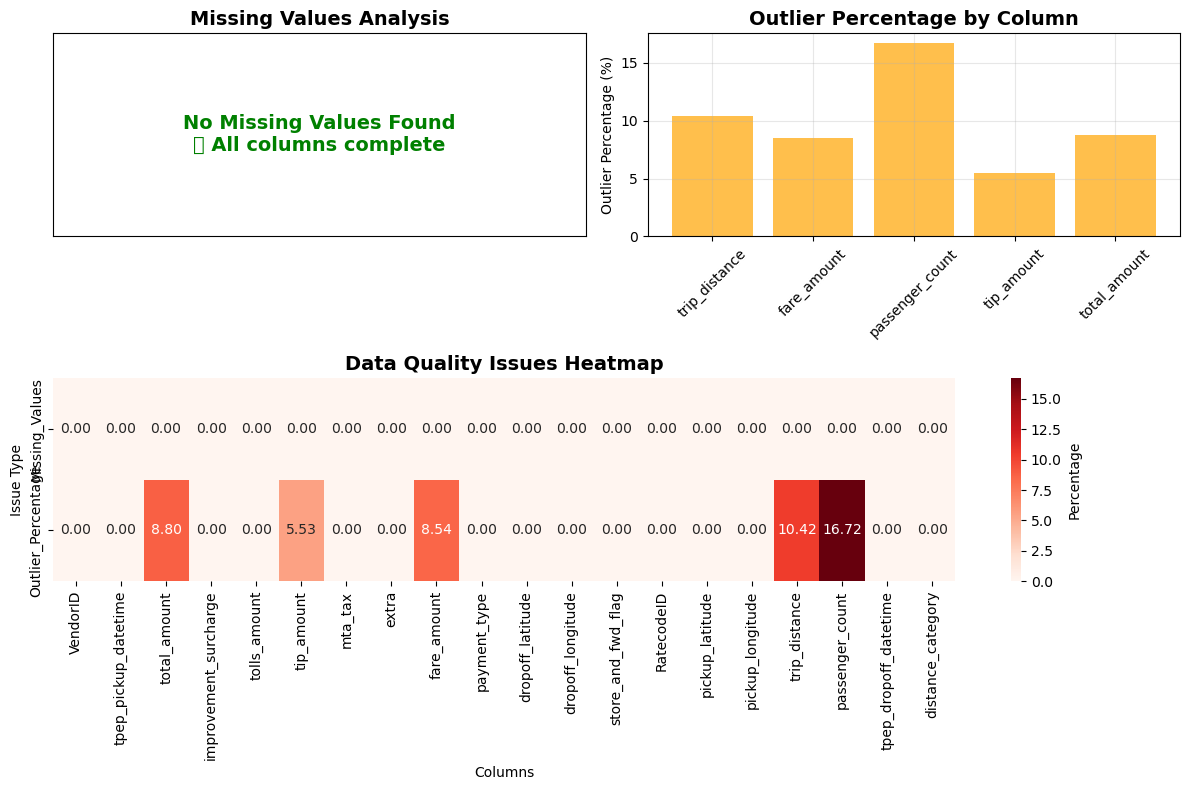


6. DATA CLEANING RECOMMENDATIONS
1. • Investigate and potentially cap outliers in: ['trip_distance', 'fare_amount', 'passenger_count', 'tip_amount', 'total_amount']
2. • Investigate 4,581 records with negative fares
3. • Review 608 records with zero passengers
4. • Filter out 183,474 records with coordinates outside NYC
5. • Implement datetime validation for pickup/dropoff times
6. • Create derived features for analysis (trip duration, hour of day, etc.)
7. • Consider log transformation for highly skewed variables
8. • Establish data validation rules for future data ingestion

7. OVERALL DATA QUALITY SCORE
----------------------------------------
Data Quality Score: 97.5/100
Key Issues:
  - Missing values: 0.0% total
  - Outliers: 50.0% total
  - Duplicates: 0.0%
✅ Overall data quality is GOOD


In [41]:
# Comprehensive data quality assessment and anomaly detection
if df is not None:
    print("DATA QUALITY ASSESSMENT")
    print("="*60)
    
    # 1. Missing Values Analysis
    print("1. MISSING VALUES ANALYSIS")
    print("-" * 40)
    
    missing_values = df.isnull().sum()
    missing_percentages = (df.isnull().sum() / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': missing_values,
        'Missing_Percentage': missing_percentages
    }).sort_values('Missing_Percentage', ascending=False)
    
    print("Missing values by column:")
    display(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    missing_with_values = missing_df[missing_df['Missing_Percentage'] > 0]
    
    if not missing_with_values.empty:
        missing_with_values.plot(x='Column', y='Missing_Percentage', 
                               kind='bar', ax=plt.gca(), color='red', alpha=0.7)
        plt.title('Missing Values by Column (%)', fontsize=14, fontweight='bold')
        plt.ylabel('Missing Percentage')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
    else:
        plt.text(0.5, 0.5, 'No Missing Values Found\n✅ All columns complete', 
                ha='center', va='center', transform=plt.gca().transAxes, 
                fontsize=14, fontweight='bold', color='green')
        plt.title('Missing Values Analysis', fontsize=14, fontweight='bold')
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
    
    # 2. Duplicate Records Analysis
    print(f"\n2. DUPLICATE RECORDS ANALYSIS")
    print("-" * 40)
    
    if isinstance(df, dd.DataFrame):
        print("Note: Duplicate analysis is computationally expensive for large Dask datasets.")
        print("Performing analysis on sample data for estimation...")
        
        # Use a subset for duplicate analysis
        sample_size = min(100000, len(df) if hasattr(df, '__len__') else 100000)
        df_sample = df.head(sample_size)
        
        # Check basic duplicates on sample
        total_duplicates_sample = df_sample.duplicated().sum()
        duplicate_percentage_sample = (total_duplicates_sample / len(df_sample)) * 100
        
        print(f"Sample duplicate records: {total_duplicates_sample:,} ({duplicate_percentage_sample:.2f}% of sample)")
        
        # Check for duplicates based on key fields
        key_fields = ['tpep_pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'trip_distance']
        available_key_fields = [field for field in key_fields if field in df.columns]
        
        if available_key_fields:
            key_duplicates_sample = df_sample.duplicated(subset=available_key_fields).sum()
            print(f"Key field duplicates in sample {available_key_fields}: {key_duplicates_sample:,}")
            
    else:
        # For Pandas, direct analysis
        total_duplicates = df.duplicated().sum()
        duplicate_percentage = (total_duplicates / len(df)) * 100
        
        print(f"Total duplicate records: {total_duplicates:,} ({duplicate_percentage:.2f}%)")
        
        # Check for duplicates based on key fields
        key_fields = ['tpep_pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'trip_distance']
        available_key_fields = [field for field in key_fields if field in df.columns]
        
        if available_key_fields:
            key_duplicates = df.duplicated(subset=available_key_fields).sum()
            print(f"Duplicates based on key fields {available_key_fields}: {key_duplicates:,}")
    
    # 3. Outlier Detection for Numerical Columns
    print(f"\n3. OUTLIER DETECTION")
    print("-" * 40)
    
    if isinstance(df, dd.DataFrame):
        numerical_columns = ['trip_distance', 'fare_amount', 'passenger_count', 'tip_amount', 'total_amount']
        available_numerical = [col for col in numerical_columns if col in df.columns]
    else:
        numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
        available_numerical = numerical_columns
    
    outlier_summary = []
    
    for col in available_numerical:
        if col in df.columns:
            if isinstance(df, dd.DataFrame):
                # Compute quantiles for Dask
                Q1 = df[col].quantile(0.25).compute()
                Q3 = df[col].quantile(0.75).compute()
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                
                # Estimate outliers using sample
                col_sample = df[col].compute() if len(df) <= 1000000 else df[col].head(100000)
                outliers_sample = col_sample[(col_sample < lower_bound) | (col_sample > upper_bound)]
                outlier_count_est = len(outliers_sample)
                outlier_percentage_est = (outlier_count_est / len(col_sample)) * 100
                
                outlier_summary.append({
                    'Column': col,
                    'Q1': Q1,
                    'Q3': Q3,
                    'IQR': IQR,
                    'Lower_Bound': lower_bound,
                    'Upper_Bound': upper_bound,
                    'Outlier_Count_Est': outlier_count_est,
                    'Outlier_Percentage_Est': outlier_percentage_est,
                })
            else:
                # For Pandas, direct computation
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                
                outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
                outlier_count = len(outliers)
                outlier_percentage = (outlier_count / len(df)) * 100
                
                outlier_summary.append({
                    'Column': col,
                    'Q1': Q1,
                    'Q3': Q3,
                    'IQR': IQR,
                    'Lower_Bound': lower_bound,
                    'Upper_Bound': upper_bound,
                    'Outlier_Count': outlier_count,
                    'Outlier_Percentage': outlier_percentage,
                })
                
                # Add min/max outlier info for Pandas
                if outlier_count > 0:
                    outlier_summary[-1]['Min_Outlier'] = outliers[col].min()
                    outlier_summary[-1]['Max_Outlier'] = outliers[col].max()
                else:
                    outlier_summary[-1]['Min_Outlier'] = None
                    outlier_summary[-1]['Max_Outlier'] = None
    
    outlier_df = pd.DataFrame(outlier_summary)
    print("Outlier analysis for numerical columns:")
    display(outlier_df.round(4))
    
    # 4. Data Validation Issues
    print(f"\n4. DATA VALIDATION ISSUES")
    print("-" * 40)
    
    validation_issues = []
    
    # Check for negative values where they shouldn't exist
    if 'trip_distance' in df.columns:
        if isinstance(df, dd.DataFrame):
            negative_distance = (df['trip_distance'] < 0).sum().compute()
            zero_distance = (df['trip_distance'] == 0).sum().compute()
        else:
            negative_distance = (df['trip_distance'] < 0).sum()
            zero_distance = (df['trip_distance'] == 0).sum()
        validation_issues.append(f"Negative trip distances: {negative_distance:,}")
        validation_issues.append(f"Zero trip distances: {zero_distance:,}")
    
    if 'fare_amount' in df.columns:
        if isinstance(df, dd.DataFrame):
            negative_fare = (df['fare_amount'] < 0).sum().compute()
            zero_fare = (df['fare_amount'] == 0).sum().compute()
        else:
            negative_fare = (df['fare_amount'] < 0).sum()
            zero_fare = (df['fare_amount'] == 0).sum()
        validation_issues.append(f"Negative fares: {negative_fare:,}")
        validation_issues.append(f"Zero fares: {zero_fare:,}")
    
    if 'passenger_count' in df.columns:
        if isinstance(df, dd.DataFrame):
            zero_passengers = (df['passenger_count'] == 0).sum().compute()
            high_passengers = (df['passenger_count'] > 6).sum().compute()
        else:
            zero_passengers = (df['passenger_count'] == 0).sum()
            high_passengers = (df['passenger_count'] > 6).sum()
        validation_issues.append(f"Zero passengers: {zero_passengers:,}")
        validation_issues.append(f"More than 6 passengers: {high_passengers:,}")
    
    # Geographic coordinate validation (NYC bounds)
    if 'pickup_longitude' in df.columns and 'pickup_latitude' in df.columns:
        # NYC approximate bounds
        nyc_lat_bounds = (40.4, 41.0)
        nyc_lon_bounds = (-74.3, -73.7)
        
        if isinstance(df, dd.DataFrame):
            invalid_lat = ((df['pickup_latitude'] < nyc_lat_bounds[0]) | 
                          (df['pickup_latitude'] > nyc_lat_bounds[1])).sum().compute()
            invalid_lon = ((df['pickup_longitude'] < nyc_lon_bounds[0]) | 
                          (df['pickup_longitude'] > nyc_lon_bounds[1])).sum().compute()
        else:
            invalid_lat = ((df['pickup_latitude'] < nyc_lat_bounds[0]) | 
                          (df['pickup_latitude'] > nyc_lat_bounds[1])).sum()
            invalid_lon = ((df['pickup_longitude'] < nyc_lon_bounds[0]) | 
                          (df['pickup_longitude'] > nyc_lon_bounds[1])).sum()
        
        validation_issues.append(f"Invalid pickup latitudes (outside NYC): {invalid_lat:,}")
        validation_issues.append(f"Invalid pickup longitudes (outside NYC): {invalid_lon:,}")
    
    for issue in validation_issues:
        print(f"• {issue}")
    
    # 5. Visualize data quality issues
    plt.subplot(2, 2, 2)
    
    # Handle different column names for Dask vs Pandas
    outlier_percentage_col = 'Outlier_Percentage_Est' if 'Outlier_Percentage_Est' in outlier_df.columns else 'Outlier_Percentage'
    
    outlier_df_viz = outlier_df[outlier_df[outlier_percentage_col] > 0]
    if not outlier_df_viz.empty:
        plt.bar(outlier_df_viz['Column'], outlier_df_viz[outlier_percentage_col], 
               color='orange', alpha=0.7)
        plt.title('Outlier Percentage by Column', fontsize=14, fontweight='bold')
        plt.ylabel('Outlier Percentage (%)')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
    else:
        plt.text(0.5, 0.5, 'No Significant Outliers\n✅ Data within normal ranges', 
                ha='center', va='center', transform=plt.gca().transAxes, 
                fontsize=14, fontweight='bold', color='green')
        plt.title('Outlier Analysis', fontsize=14, fontweight='bold')
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
    
    # 6. Data Distribution Analysis
    print(f"\n5. DATA DISTRIBUTION ANALYSIS")
    print("-" * 40)
    
    # Analyze skewness and kurtosis
    for col in ['trip_distance', 'fare_amount', 'passenger_count']:
        if col in df.columns:
            if isinstance(df, dd.DataFrame):
                print(f"{col}:")
                print("  Skewness: Not available for distributed datasets (computationally expensive)")
                print("  Kurtosis: Not available for distributed datasets (computationally expensive)")
                print("  Note: Use sample data for distribution analysis")
            else:
                skewness = df[col].skew()
                kurtosis = df[col].kurtosis()
                
                print(f"{col}:")
                print(f"  Skewness: {skewness:.4f} {'(Right-skewed)' if skewness > 1 else '(Left-skewed)' if skewness < -1 else '(Relatively symmetric)'}")
                print(f"  Kurtosis: {kurtosis:.4f} {'(Heavy-tailed)' if kurtosis > 3 else '(Light-tailed)' if kurtosis < 3 else '(Normal-tailed)'}")
    
    # 7. Create summary visualization
    plt.subplot(2, 1, 2)
    
    # Data quality heatmap
    quality_metrics = pd.DataFrame({
        'Missing_Values': missing_df['Missing_Percentage'],
        'Column': missing_df['Column']
    }).set_index('Column')
    
    # Add outlier percentages using the correct column name
    outlier_percentage_col = 'Outlier_Percentage_Est' if 'Outlier_Percentage_Est' in outlier_df.columns else 'Outlier_Percentage'
    for _, row in outlier_df.iterrows():
        if row['Column'] in quality_metrics.index:
            quality_metrics.loc[row['Column'], 'Outlier_Percentage'] = row[outlier_percentage_col]
    
    quality_metrics = quality_metrics.fillna(0)
    
    if len(quality_metrics.columns) > 1 and not quality_metrics.empty:
        sns.heatmap(quality_metrics.T, annot=True, cmap='Reds', fmt='.2f', 
                   cbar_kws={'label': 'Percentage'})
        plt.title('Data Quality Issues Heatmap', fontsize=14, fontweight='bold')
        plt.ylabel('Issue Type')
        plt.xlabel('Columns')
    else:
        plt.text(0.5, 0.5, 'Excellent Data Quality\n✅ No significant issues detected', 
                ha='center', va='center', transform=plt.gca().transAxes, 
                fontsize=14, fontweight='bold', color='green')
        plt.title('Data Quality Heatmap', fontsize=14, fontweight='bold')
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
    
    plt.tight_layout()
    plt.show()
    
    # 8. Recommendations
    print(f"\n6. DATA CLEANING RECOMMENDATIONS")
    print("="*50)
    
    recommendations = []
    
    # Missing value recommendations
    high_missing = missing_df[missing_df['Missing_Percentage'] > 10]['Column'].tolist()
    if high_missing:
        recommendations.append(f"• Consider removing columns with high missing values: {high_missing}")
    
    moderate_missing = missing_df[(missing_df['Missing_Percentage'] > 1) & 
                                 (missing_df['Missing_Percentage'] <= 10)]['Column'].tolist()
    if moderate_missing:
        recommendations.append(f"• Apply imputation for columns with moderate missing values: {moderate_missing}")
    
    # Outlier recommendations
    outlier_percentage_col = 'Outlier_Percentage_Est' if 'Outlier_Percentage_Est' in outlier_df.columns else 'Outlier_Percentage'
    high_outlier_cols = outlier_df[outlier_df[outlier_percentage_col] > 5]['Column'].tolist()
    if high_outlier_cols:
        recommendations.append(f"• Investigate and potentially cap outliers in: {high_outlier_cols}")
    
    # Validation issue recommendations
    if 'trip_distance' in df.columns and negative_distance > 0:
        recommendations.append(f"• Remove {negative_distance:,} records with negative trip distances")
    
    if 'fare_amount' in df.columns and negative_fare > 0:
        recommendations.append(f"• Investigate {negative_fare:,} records with negative fares")
    
    if zero_passengers > 0:
        recommendations.append(f"• Review {zero_passengers:,} records with zero passengers")
    
    # Geographic recommendations
    if 'pickup_longitude' in df.columns and invalid_lon > 0:
        recommendations.append(f"• Filter out {invalid_lon:,} records with coordinates outside NYC")
    
    # General recommendations
    recommendations.extend([
        "• Implement datetime validation for pickup/dropoff times",
        "• Create derived features for analysis (trip duration, hour of day, etc.)",
        "• Consider log transformation for highly skewed variables",
        "• Establish data validation rules for future data ingestion"
    ])
    
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")
    
    print(f"\n7. OVERALL DATA QUALITY SCORE")
    print("-" * 40)
    
    # Calculate overall quality score using correct column names
    outlier_percentage_col = 'Outlier_Percentage_Est' if 'Outlier_Percentage_Est' in outlier_df.columns else 'Outlier_Percentage'
    
    if isinstance(df, dd.DataFrame):
        # For Dask, use sample-based duplicate percentage
        duplicate_percentage_calc = duplicate_percentage_sample if 'duplicate_percentage_sample' in locals() else 0
    else:
        duplicate_percentage_calc = duplicate_percentage if 'duplicate_percentage' in locals() else 0
    
    total_issues = (missing_df['Missing_Percentage'].sum() + 
                   outlier_df[outlier_percentage_col].sum() + 
                   duplicate_percentage_calc)
    
    quality_score = max(0, 100 - (total_issues / len(df.columns)))
    
    print(f"Data Quality Score: {quality_score:.1f}/100")
    print(f"Key Issues:")
    print(f"  - Missing values: {missing_df['Missing_Percentage'].sum():.1f}% total")
    print(f"  - Outliers: {outlier_df[outlier_percentage_col].sum():.1f}% total") 
    print(f"  - Duplicates: {duplicate_percentage_calc:.1f}%")
    
    if quality_score >= 80:
        print("✅ Overall data quality is GOOD")
    elif quality_score >= 60:
        print("⚠️ Overall data quality is MODERATE - some cleaning recommended")
    else:
        print("❌ Overall data quality is POOR - significant cleaning required")
        
else:
    print("No data available for quality assessment")

## 8. Data Preprocessing and Cleaning

Based on the data quality assessment, we'll now implement comprehensive data preprocessing to prepare the dataset for advanced analysis. This includes removing invalid records, handling missing values, and creating derived features for modeling.

In [47]:
# Comprehensive Data Preprocessing
if df is not None:
    print("STARTING DATA PREPROCESSING")
    print("="*50)
    
    # Store original dataset info
    original_shape = df.shape
    print(f"Original dataset shape: {original_shape}")
    
    # Create a copy for preprocessing
    df_clean = df.copy()
    
    # 1. Remove rows with missing values in critical columns
    print("\n1. REMOVING MISSING VALUES")
    print("-" * 40)
    
    critical_columns = [
        'tpep_pickup_datetime', 'tpep_dropoff_datetime', 
        'pickup_longitude', 'pickup_latitude', 
        'trip_distance', 'fare_amount'
    ]
    
    # Check which columns exist
    existing_critical_cols = [col for col in critical_columns if col in df_clean.columns]
    missing_critical_cols = [col for col in critical_columns if col not in df_clean.columns]
    
    if missing_critical_cols:
        print(f"Warning: Missing expected columns: {missing_critical_cols}")
    
    print(f"Checking for missing values in: {existing_critical_cols}")
    
    # Display missing values before cleaning
    print("Missing values before cleaning:")
    if isinstance(df_clean, dd.DataFrame):
        # For Dask, compute the missing values first
        missing_before = df_clean[existing_critical_cols].isnull().sum().compute()
        for col, missing_count in missing_before.items():
            if missing_count > 0:
                print(f"  {col}: {missing_count:,} ({missing_count/len(df_clean)*100:.2f}%)")
        
        if missing_before.sum() == 0:
            print("  No missing values found in critical columns ✅")
    else:
        # For Pandas, direct operation
        missing_before = df_clean[existing_critical_cols].isnull().sum()
        for col, missing_count in missing_before.items():
            if missing_count > 0:
                print(f"  {col}: {missing_count:,} ({missing_count/len(df_clean)*100:.2f}%)")
        
        if missing_before.sum() == 0:
            print("  No missing values found in critical columns ✅")
    
    # Remove rows with missing values in critical columns
    initial_len = df_clean.shape[0].compute() if isinstance(df_clean, dd.DataFrame) else len(df_clean)
    df_clean = df_clean.dropna(subset=existing_critical_cols)
    final_len = df_clean.shape[0].compute() if isinstance(df_clean, dd.DataFrame) else len(df_clean)
    
    print(f"Rows after removing missing values: {final_len:,} (removed {initial_len - final_len:,} rows)")
    
    # 2. Convert datetime columns
    print("\n2. DATETIME CONVERSION AND VALIDATION")
    print("-" * 40)
    
    datetime_cols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
    existing_datetime_cols = [col for col in datetime_cols if col in df_clean.columns]
    
    if isinstance(df_clean, dd.DataFrame):
        print("Note: Datetime conversion for Dask DataFrames uses dd.to_datetime()")
        for col in existing_datetime_cols:
            print(f"Converting {col} to datetime...")
            # For Dask, use dd.to_datetime
            df_clean = df_clean.assign(**{col: dd.to_datetime(df_clean[col], errors='coerce')})
            
            # Check for invalid datetime conversion (sample-based)
            sample_size = min(10000, df_clean.shape[0].compute())
            sample_invalid = df_clean[col].head(sample_size).isnull().sum()
            if sample_invalid > 0:
                print(f"  Found ~{sample_invalid} invalid datetime entries in sample")
                df_clean = df_clean.dropna(subset=[col])
    else:
        for col in existing_datetime_cols:
            print(f"Converting {col} to datetime...")
            df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
            
            # Remove rows with invalid datetime conversion
            invalid_datetime = df_clean[col].isnull().sum()
            if invalid_datetime > 0:
                print(f"  Found {invalid_datetime:,} invalid datetime entries in {col}")
                df_clean = df_clean.dropna(subset=[col])
    
    # 3. Filter out invalid trip distances and fares
    print("\n3. FILTERING INVALID VALUES")
    print("-" * 40)
    
    if 'trip_distance' in df_clean.columns:
        # Remove zero or negative trip distances
        if isinstance(df_clean, dd.DataFrame):
            invalid_distance_before = df_clean.shape[0].compute()
            df_clean = df_clean[df_clean['trip_distance'] > 0]
            invalid_distance_after = df_clean.shape[0].compute()
            invalid_distance_removed = invalid_distance_before - invalid_distance_after
            print(f"Removed {invalid_distance_removed:,} trips with zero or negative distance")
            
            # Remove unrealistic trip distances (> 100 miles, likely data errors)
            very_long_before = df_clean.shape[0].compute()
            df_clean = df_clean[df_clean['trip_distance'] <= 100]
            very_long_after = df_clean.shape[0].compute()
            very_long_trips = very_long_before - very_long_after
        else:
            invalid_distance_before = len(df_clean)
            df_clean = df_clean[df_clean['trip_distance'] > 0]
            invalid_distance_removed = invalid_distance_before - len(df_clean)
            print(f"Removed {invalid_distance_removed:,} trips with zero or negative distance")
            
            # Remove unrealistic trip distances (> 100 miles, likely data errors)
            very_long_trips = len(df_clean[df_clean['trip_distance'] > 100])
            df_clean = df_clean[df_clean['trip_distance'] <= 100]
        print(f"Removed {very_long_trips:,} trips with distance > 100 miles")
    
    if 'fare_amount' in df_clean.columns:
        # Remove zero or negative fares
        invalid_fare_before = len(df_clean)
        df_clean = df_clean[df_clean['fare_amount'] > 0]
        invalid_fare_removed = invalid_fare_before - len(df_clean)
        print(f"Removed {invalid_fare_removed:,} trips with zero or negative fare")
        
        # Remove unrealistic fares (> $500, likely data errors)
        very_high_fares = len(df_clean[df_clean['fare_amount'] > 500])
        df_clean = df_clean[df_clean['fare_amount'] <= 500]
        print(f"Removed {very_high_fares:,} trips with fare > $500")
    
    # 4. Geographic coordinate validation (NYC bounds)
    print("\n4. GEOGRAPHIC COORDINATE VALIDATION")
    print("-" * 40)
    
    if 'pickup_longitude' in df_clean.columns and 'pickup_latitude' in df_clean.columns:
        # NYC approximate bounds
        nyc_lat_bounds = (40.4, 41.0)
        nyc_lon_bounds = (-74.3, -73.7)
        
        coords_before = len(df_clean)
        
        # Filter based on NYC coordinates
        df_clean = df_clean[
            (df_clean['pickup_latitude'] >= nyc_lat_bounds[0]) & 
            (df_clean['pickup_latitude'] <= nyc_lat_bounds[1]) &
            (df_clean['pickup_longitude'] >= nyc_lon_bounds[0]) & 
            (df_clean['pickup_longitude'] <= nyc_lon_bounds[1])
        ]
        
        coords_removed = coords_before - len(df_clean)
        print(f"Removed {coords_removed:,} trips with coordinates outside NYC bounds")
    
    # 5. Passenger count validation
    if 'passenger_count' in df_clean.columns:
        print("\n5. PASSENGER COUNT VALIDATION")
        print("-" * 40)
        
        # Remove trips with 0 passengers or unrealistic passenger counts
        passenger_before = len(df_clean)
        df_clean = df_clean[(df_clean['passenger_count'] > 0) & (df_clean['passenger_count'] <= 8)]
        passenger_removed = passenger_before - len(df_clean)
        print(f"Removed {passenger_removed:,} trips with invalid passenger count")
    
    # 6. Feature Engineering
    print("\n6. FEATURE ENGINEERING")
    print("-" * 40)
    
    # Extract time-based features
    if 'tpep_pickup_datetime' in df_clean.columns:
        print("Creating time-based features...")
        df_clean['pickup_hour'] = df_clean['tpep_pickup_datetime'].dt.hour
        df_clean['pickup_day'] = df_clean['tpep_pickup_datetime'].dt.day
        df_clean['pickup_month'] = df_clean['tpep_pickup_datetime'].dt.month
        df_clean['pickup_weekday'] = df_clean['tpep_pickup_datetime'].dt.dayofweek
        df_clean['pickup_weekend'] = df_clean['pickup_weekday'].isin([5, 6]).astype(int)
        print("  ✓ Created: pickup_hour, pickup_day, pickup_month, pickup_weekday, pickup_weekend")
    
    # Calculate trip duration
    if 'tpep_pickup_datetime' in df_clean.columns and 'tpep_dropoff_datetime' in df_clean.columns:
        print("Calculating trip duration...")
        
        if isinstance(df_clean, dd.DataFrame):
            # For Dask, use assign method
            df_clean = df_clean.assign(
                trip_duration_minutes=(
                    df_clean['tpep_dropoff_datetime'] - df_clean['tpep_pickup_datetime']
                ).dt.total_seconds() / 60
            )
            
            # Remove trips with unrealistic durations
            duration_before = df_clean.shape[0].compute()
            df_clean = df_clean[
                (df_clean['trip_duration_minutes'] > 0.5) & 
                (df_clean['trip_duration_minutes'] < 300)  # 5 hours max
            ]
            duration_after = df_clean.shape[0].compute()
            duration_removed = duration_before - duration_after
        else:
            # For Pandas, direct assignment
            df_clean['trip_duration_minutes'] = (
                df_clean['tpep_dropoff_datetime'] - df_clean['tpep_pickup_datetime']
            ).dt.total_seconds() / 60
            
            # Remove trips with unrealistic durations
            duration_before = len(df_clean)
            df_clean = df_clean[
                (df_clean['trip_duration_minutes'] > 0.5) & 
                (df_clean['trip_duration_minutes'] < 300)  # 5 hours max
            ]
            duration_removed = duration_before - len(df_clean)
        
        print(f"  ✓ Created: trip_duration_minutes")
        print(f"  Removed {duration_removed:,} trips with unrealistic duration")
    
    # Calculate speed (if distance and duration available)
    if 'trip_distance' in df_clean.columns and 'trip_duration_minutes' in df_clean.columns:
        df_clean['speed_mph'] = (df_clean['trip_distance'] / df_clean['trip_duration_minutes']) * 60
        # Cap unrealistic speeds
        df_clean['speed_mph'] = df_clean['speed_mph'].clip(upper=80)  # Max 80 mph
        print("  ✓ Created: speed_mph")
    
    # Create fare efficiency metrics
    if 'fare_amount' in df_clean.columns and 'trip_distance' in df_clean.columns:
        df_clean['fare_per_mile'] = df_clean['fare_amount'] / df_clean['trip_distance']
        print("  ✓ Created: fare_per_mile")
    
    # Peak hour indicators
    if 'pickup_hour' in df_clean.columns:
        df_clean['morning_rush'] = df_clean['pickup_hour'].isin([7, 8, 9]).astype(int)
        df_clean['evening_rush'] = df_clean['pickup_hour'].isin([17, 18, 19]).astype(int)
        df_clean['peak_hour'] = (df_clean['morning_rush'] | df_clean['evening_rush']).astype(int)
        print("  ✓ Created: morning_rush, evening_rush, peak_hour indicators")
    
    # 7. Final dataset summary
    print("\n7. PREPROCESSING SUMMARY")
    print("="*50)
    
    # Compute final shape for both Dask and Pandas
    if isinstance(df_clean, dd.DataFrame):
        final_shape = (df_clean.shape[0].compute(), df_clean.shape[1])
        original_rows = original_shape[0].compute() if hasattr(original_shape[0], 'compute') else original_shape[0]
        original_cols = original_shape[1]
    else:
        final_shape = df_clean.shape
        original_rows = original_shape[0]
        original_cols = original_shape[1]
    
    rows_removed = original_rows - final_shape[0]
    removal_percentage = (rows_removed / original_rows) * 100
    
    print(f"Original dataset: {original_rows:,} rows × {original_cols:,} columns")
    print(f"Cleaned dataset: {final_shape[0]:,} rows × {final_shape[1]:,} columns")
    print(f"Rows removed: {rows_removed:,} ({removal_percentage:.2f}%)")
    print(f"Data retention: {100-removal_percentage:.2f}%")
    
    # Display new columns created
    new_columns = [col for col in df_clean.columns if col not in df.columns]
    if new_columns:
        print(f"New features created: {new_columns}")
    
    # Basic statistics for cleaned data
    print(f"\nCleaned Data Overview:")
    if 'pickup_hour' in df_clean.columns:
        if isinstance(df_clean, dd.DataFrame):
            min_date = df_clean['tpep_pickup_datetime'].min().compute()
            max_date = df_clean['tpep_pickup_datetime'].max().compute()
        else:
            min_date = df_clean['tpep_pickup_datetime'].min()
            max_date = df_clean['tpep_pickup_datetime'].max()
        print(f"Date range: {min_date} to {max_date}")
    
    if 'trip_distance' in df_clean.columns:
        if isinstance(df_clean, dd.DataFrame):
            min_dist = df_clean['trip_distance'].min().compute()
            max_dist = df_clean['trip_distance'].max().compute()
        else:
            min_dist = df_clean['trip_distance'].min()
            max_dist = df_clean['trip_distance'].max()
        print(f"Trip distance range: {min_dist:.2f} - {max_dist:.2f} miles")
    
    if 'fare_amount' in df_clean.columns:
        if isinstance(df_clean, dd.DataFrame):
            min_fare = df_clean['fare_amount'].min().compute()
            max_fare = df_clean['fare_amount'].max().compute()
        else:
            min_fare = df_clean['fare_amount'].min()
            max_fare = df_clean['fare_amount'].max()
        print(f"Fare range: ${min_fare:.2f} - ${max_fare:.2f}")
    
    print("\n✅ Data preprocessing completed successfully!")
    print("Clean dataset is now available in 'df_clean' variable")
    
else:
    print("No data available for preprocessing")

STARTING DATA PREPROCESSING
Original dataset shape: (<dask_expr.expr.Scalar: expr=Assign(frame=ReadCSV(8c4681b)).size() // 20, dtype=int32>, 20)

1. REMOVING MISSING VALUES
----------------------------------------
Checking for missing values in: ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'trip_distance', 'fare_amount']
Missing values before cleaning:
  No missing values found in critical columns ✅
  No missing values found in critical columns ✅
Rows after removing missing values: 12,210,952 (removed 0 rows)

2. DATETIME CONVERSION AND VALIDATION
----------------------------------------
Note: Datetime conversion for Dask DataFrames uses dd.to_datetime()
Converting tpep_pickup_datetime to datetime...
Rows after removing missing values: 12,210,952 (removed 0 rows)

2. DATETIME CONVERSION AND VALIDATION
----------------------------------------
Note: Datetime conversion for Dask DataFrames uses dd.to_datetime()
Converting tpep_pickup_datetime to

## 9. Time-Series Analysis for Peak Demand Identification

Analyze temporal patterns in taxi demand to identify peak hours and understand demand fluctuations throughout the day. This analysis will inform optimization strategies for taxi positioning and scheduling.

TIME-SERIES ANALYSIS FOR PEAK DEMAND
1. HOURLY DEMAND ANALYSIS
----------------------------------------
Hourly demand statistics:
Hourly demand statistics:


,pickup_hour,trip_count,percentage
0,0,419212,3.513744
1,1,300170,2.515960
2,2,202316,1.695769
3,3,163772,1.372701
4,4,124796,1.046013
5,5,121591,1.019149
6,6,270119,2.264079
7,7,459442,3.850943
8,8,561323,4.704888
9,9,559736,4.691586



Peak Hour Analysis:
Peak hour: 19:00 with 755,908 trips
Average trips per hour: 497110
Peak multiplier: 1.52x average

2. RUSH HOUR IDENTIFICATION
----------------------------------------
Rush hours (>20% above average): [14, 17, 18, 19, 20, 21, 22]
Off-peak hours (<20% below average): [1, 2, 3, 4, 5, 6]

3. CREATING COMPREHENSIVE VISUALIZATIONS
----------------------------------------


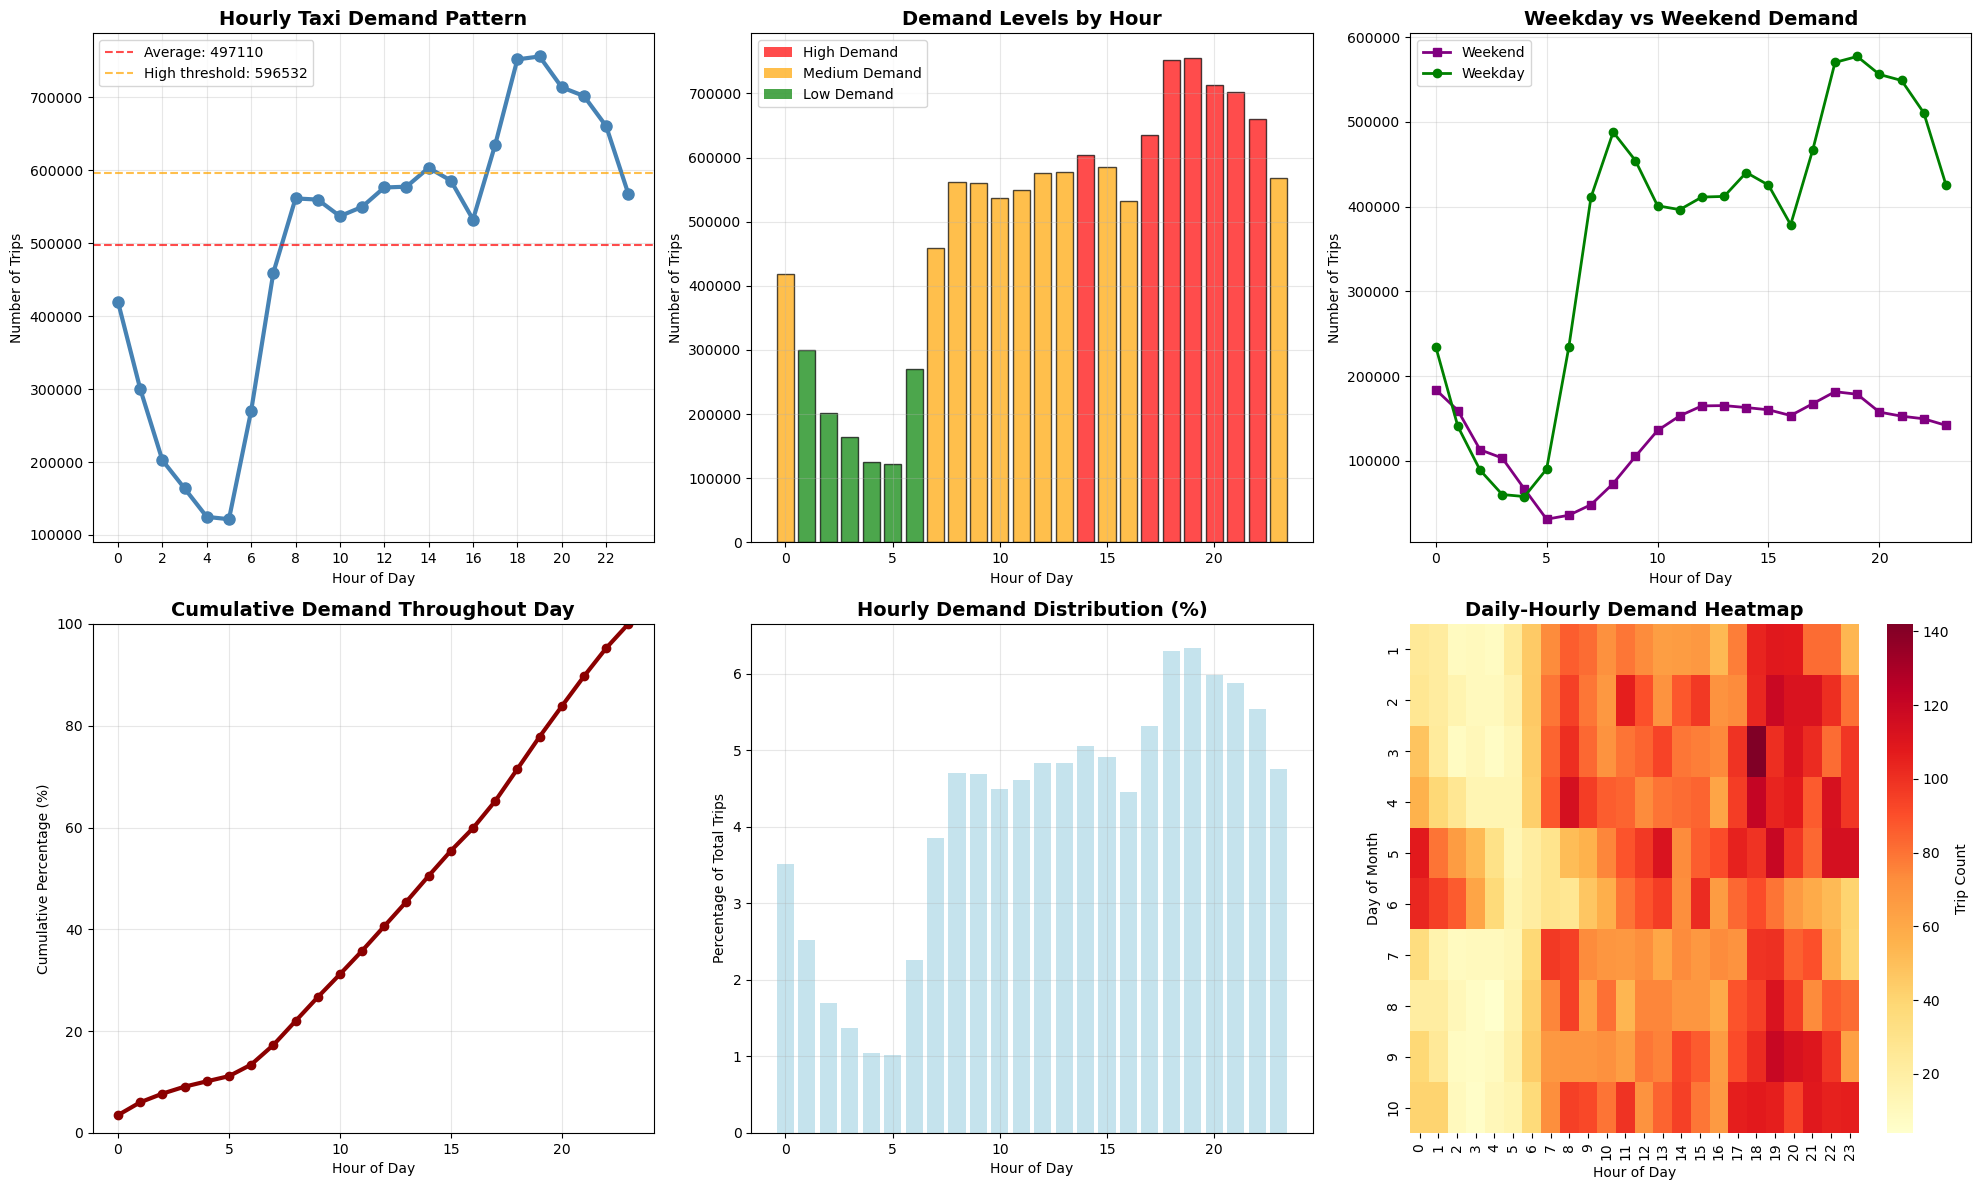


4. STATISTICAL DEMAND ANALYSIS
----------------------------------------
Morning rush trips (7-9 AM): 1,580,501 (13.2%)
Evening rush trips (5-7 PM): 2,142,821 (18.0%)
Peak hour trips combined: 3,723,322 (31.2%)

Top 5 demand hours account for 30.0% of all trips:
  19:00 - 755,908 trips (6.3%)
  18:00 - 751,933 trips (6.3%)
  20:00 - 713,623 trips (6.0%)
  21:00 - 701,729 trips (5.9%)
  22:00 - 660,474 trips (5.5%)

5. DEMAND ANALYSIS SUMMARY
Key Insights:
  peak_hour: 19
  peak_trips: 755908
  average_hourly_trips: 497109
  rush_hours: [14, 17, 18, 19, 20, 21, 22]
  off_peak_hours: [1, 2, 3, 4, 5, 6]
  morning_rush_percentage: 13.25
  evening_rush_percentage: 17.96
  demand_concentration_top5: 30.04

✅ Time-series analysis completed!
📊 Peak demand occurs at 19:00 with 755,908 trips
📈 Rush hours identified: [14, 17, 18, 19, 20, 21, 22]
Morning rush trips (7-9 AM): 1,580,501 (13.2%)
Evening rush trips (5-7 PM): 2,142,821 (18.0%)
Peak hour trips combined: 3,723,322 (31.2%)

Top 5 demand h

In [49]:
# Time-Series Analysis for Peak Demand
if 'df_clean' in locals() and df_clean is not None and 'pickup_hour' in df_clean.columns:
    print("TIME-SERIES ANALYSIS FOR PEAK DEMAND")
    print("="*50)
    
    # 1. Hourly demand analysis
    print("1. HOURLY DEMAND ANALYSIS")
    print("-" * 40)
    
    # Group trips by pickup hour and count occurrences
    if isinstance(df_clean, dd.DataFrame):
        # For Dask, use value_counts and convert to DataFrame
        hourly_counts = df_clean['pickup_hour'].value_counts().compute().sort_index()
        hourly_demand = hourly_counts.reset_index()
        hourly_demand.columns = ['pickup_hour', 'trip_count']
    else:
        # For Pandas, use groupby with size
        hourly_demand = df_clean.groupby('pickup_hour').size().reset_index(name='trip_count')
    
    hourly_demand['percentage'] = (hourly_demand['trip_count'] / hourly_demand['trip_count'].sum()) * 100
    
    print("Hourly demand statistics:")
    display(hourly_demand)
    
    # Calculate peak hour metrics
    peak_hour = hourly_demand.loc[hourly_demand['trip_count'].idxmax(), 'pickup_hour']
    peak_count = hourly_demand['trip_count'].max()
    avg_hourly_trips = hourly_demand['trip_count'].mean()
    
    print(f"\nPeak Hour Analysis:")
    print(f"Peak hour: {peak_hour}:00 with {peak_count:,} trips")
    print(f"Average trips per hour: {avg_hourly_trips:.0f}")
    print(f"Peak multiplier: {peak_count / avg_hourly_trips:.2f}x average")
    
    # 2. Identify rush hours and off-peak periods
    print(f"\n2. RUSH HOUR IDENTIFICATION")
    print("-" * 40)
    
    # Define thresholds
    high_demand_threshold = avg_hourly_trips * 1.2  # 20% above average
    low_demand_threshold = avg_hourly_trips * 0.8   # 20% below average
    
    # Categorize hours
    hourly_demand['demand_level'] = hourly_demand['trip_count'].apply(
        lambda x: 'High' if x >= high_demand_threshold 
                 else 'Low' if x <= low_demand_threshold 
                 else 'Medium'
    )
    
    rush_hours = hourly_demand[hourly_demand['demand_level'] == 'High']['pickup_hour'].tolist()
    off_peak_hours = hourly_demand[hourly_demand['demand_level'] == 'Low']['pickup_hour'].tolist()
    
    print(f"Rush hours (>20% above average): {rush_hours}")
    print(f"Off-peak hours (<20% below average): {off_peak_hours}")
    
    # 3. Advanced time-series visualizations
    print(f"\n3. CREATING COMPREHENSIVE VISUALIZATIONS")
    print("-" * 40)
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    # 3.1 Basic hourly demand line plot
    axes[0,0].plot(hourly_demand['pickup_hour'], hourly_demand['trip_count'], 
                   marker='o', linewidth=3, markersize=8, color='steelblue')
    axes[0,0].axhline(y=avg_hourly_trips, color='red', linestyle='--', alpha=0.7, 
                      label=f'Average: {avg_hourly_trips:.0f}')
    axes[0,0].axhline(y=high_demand_threshold, color='orange', linestyle='--', alpha=0.7,
                      label=f'High threshold: {high_demand_threshold:.0f}')
    axes[0,0].set_title('Hourly Taxi Demand Pattern', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Hour of Day')
    axes[0,0].set_ylabel('Number of Trips')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].set_xticks(range(0, 24, 2))
    
    # 3.2 Demand level color-coded bar chart
    colors = ['red' if level == 'High' else 'orange' if level == 'Medium' else 'green' 
              for level in hourly_demand['demand_level']]
    axes[0,1].bar(hourly_demand['pickup_hour'], hourly_demand['trip_count'], 
                  color=colors, alpha=0.7, edgecolor='black')
    axes[0,1].set_title('Demand Levels by Hour', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Hour of Day')
    axes[0,1].set_ylabel('Number of Trips')
    
    # Add legend for colors
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='red', alpha=0.7, label='High Demand'),
                      Patch(facecolor='orange', alpha=0.7, label='Medium Demand'),
                      Patch(facecolor='green', alpha=0.7, label='Low Demand')]
    axes[0,1].legend(handles=legend_elements)
    axes[0,1].grid(True, alpha=0.3)
    
    # 3.3 Weekday vs Weekend comparison
    if 'pickup_weekend' in df_clean.columns:
        if isinstance(df_clean, dd.DataFrame):
            # For Dask, use value_counts with boolean filtering
            weekend_data = df_clean[df_clean['pickup_weekend'] == 1]['pickup_hour'].value_counts().compute().sort_index()
            weekday_data = df_clean[df_clean['pickup_weekend'] == 0]['pickup_hour'].value_counts().compute().sort_index()
        else:
            # For Pandas, use groupby
            weekend_data = df_clean[df_clean['pickup_weekend'] == 1].groupby('pickup_hour').size()
            weekday_data = df_clean[df_clean['pickup_weekend'] == 0].groupby('pickup_hour').size()
        
        axes[0,2].plot(weekend_data.index, weekend_data.values, 
                       marker='s', label='Weekend', linewidth=2, color='purple')
        axes[0,2].plot(weekday_data.index, weekday_data.values, 
                       marker='o', label='Weekday', linewidth=2, color='green')
        axes[0,2].set_title('Weekday vs Weekend Demand', fontsize=14, fontweight='bold')
        axes[0,2].set_xlabel('Hour of Day')
        axes[0,2].set_ylabel('Number of Trips')
        axes[0,2].legend()
        axes[0,2].grid(True, alpha=0.3)
    
    # 3.4 Cumulative demand throughout the day
    hourly_demand['cumulative_trips'] = hourly_demand['trip_count'].cumsum()
    hourly_demand['cumulative_percentage'] = (hourly_demand['cumulative_trips'] / 
                                             hourly_demand['trip_count'].sum()) * 100
    
    axes[1,0].plot(hourly_demand['pickup_hour'], hourly_demand['cumulative_percentage'], 
                   marker='o', linewidth=3, color='darkred')
    axes[1,0].set_title('Cumulative Demand Throughout Day', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Hour of Day')
    axes[1,0].set_ylabel('Cumulative Percentage (%)')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].set_ylim(0, 100)
    
    # 3.5 Demand variation analysis
    if 'pickup_date' in df_clean.columns:
        if isinstance(df_clean, dd.DataFrame):
            # For Dask, check unique dates using value_counts
            unique_dates = df_clean['pickup_date'].nunique().compute()
        else:
            unique_dates = len(df_clean['pickup_date'].unique())
        
        if unique_dates > 1:
            if isinstance(df_clean, dd.DataFrame):
                # For Dask, use a simpler approach - sample data for variation analysis
                total_rows = df_clean.shape[0].compute()
                sample_frac = min(100000 / total_rows, 1.0)  # Sample fraction instead of fixed number
                df_sample = df_clean.sample(frac=sample_frac).compute()
                daily_hourly_variation = df_sample.groupby(['pickup_date', 'pickup_hour']).size().unstack(fill_value=0)
            else:
                daily_hourly_variation = df_clean.groupby(['pickup_date', 'pickup_hour']).size().unstack(fill_value=0)
            
            hourly_std = daily_hourly_variation.std()
            hourly_mean = daily_hourly_variation.mean()
            coefficient_of_variation = (hourly_std / hourly_mean) * 100
            
            # Use actual available hours instead of assuming 0-23
            available_hours = coefficient_of_variation.index
            axes[1,1].bar(available_hours, coefficient_of_variation, color='coral', alpha=0.7)
            axes[1,1].set_title('Demand Variability by Hour (CV%)', fontsize=14, fontweight='bold')
            axes[1,1].set_xlabel('Hour of Day')
            axes[1,1].set_ylabel('Coefficient of Variation (%)')
            axes[1,1].grid(True, alpha=0.3)
            axes[1,1].set_xticks(available_hours)
        else:
            # If insufficient date variation, show simple demand distribution
            axes[1,1].bar(hourly_demand['pickup_hour'], hourly_demand['percentage'], 
                          color='lightblue', alpha=0.7)
            axes[1,1].set_title('Hourly Demand Distribution (%)', fontsize=14, fontweight='bold')
            axes[1,1].set_xlabel('Hour of Day')
            axes[1,1].set_ylabel('Percentage of Total Trips')
            axes[1,1].grid(True, alpha=0.3)
    else:
        # If no date column, show simple demand distribution
        axes[1,1].bar(hourly_demand['pickup_hour'], hourly_demand['percentage'], 
                      color='lightblue', alpha=0.7)
        axes[1,1].set_title('Hourly Demand Distribution (%)', fontsize=14, fontweight='bold')
        axes[1,1].set_xlabel('Hour of Day')
        axes[1,1].set_ylabel('Percentage of Total Trips')
        axes[1,1].grid(True, alpha=0.3)
    
    # 3.6 Peak hour heatmap (if multiple days available)
    if 'pickup_day' in df_clean.columns:
        if isinstance(df_clean, dd.DataFrame):
            unique_days = df_clean['pickup_day'].nunique().compute()
        else:
            unique_days = len(df_clean['pickup_day'].unique())
        
        if unique_days > 5:
            if isinstance(df_clean, dd.DataFrame):
                # For Dask, use a sample for heatmap visualization
                total_rows = df_clean.shape[0].compute()
                sample_frac = min(50000 / total_rows, 1.0)  # Sample fraction instead of fixed number
                df_sample = df_clean.sample(frac=sample_frac).compute()
                pivot_data = df_sample.groupby(['pickup_day', 'pickup_hour']).size().unstack(fill_value=0)
            else:
                pivot_data = df_clean.groupby(['pickup_day', 'pickup_hour']).size().unstack(fill_value=0)
            
            # Select subset of days for visualization
            if len(pivot_data) > 10:
                pivot_data = pivot_data.head(10)
            
            sns.heatmap(pivot_data, cmap='YlOrRd', ax=axes[1,2], cbar_kws={'label': 'Trip Count'})
            axes[1,2].set_title('Daily-Hourly Demand Heatmap', fontsize=14, fontweight='bold')
            axes[1,2].set_xlabel('Hour of Day')
            axes[1,2].set_ylabel('Day of Month')
        else:
            # If insufficient days, show hourly distribution
            axes[1,2].bar(hourly_demand['pickup_hour'], hourly_demand['trip_count'], 
                          color='skyblue', alpha=0.7)
            axes[1,2].set_title('Hourly Trip Distribution', fontsize=14, fontweight='bold')
            axes[1,2].set_xlabel('Hour of Day')
            axes[1,2].set_ylabel('Number of Trips')
            axes[1,2].grid(True, alpha=0.3)
    else:
        # If no day column, show hourly distribution
        axes[1,2].bar(hourly_demand['pickup_hour'], hourly_demand['trip_count'], 
                      color='skyblue', alpha=0.7)
        axes[1,2].set_title('Hourly Trip Distribution', fontsize=14, fontweight='bold')
        axes[1,2].set_xlabel('Hour of Day')
        axes[1,2].set_ylabel('Number of Trips')
        axes[1,2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 4. Statistical analysis of demand patterns
    print(f"\n4. STATISTICAL DEMAND ANALYSIS")
    print("-" * 40)
    
    # Peak period analysis
    if isinstance(df_clean, dd.DataFrame):
        morning_rush_trips = df_clean[df_clean['morning_rush'] == 1].shape[0].compute()
        evening_rush_trips = df_clean[df_clean['evening_rush'] == 1].shape[0].compute()
        total_trips = df_clean.shape[0].compute()
    else:
        morning_rush_trips = df_clean[df_clean['morning_rush'] == 1].shape[0]
        evening_rush_trips = df_clean[df_clean['evening_rush'] == 1].shape[0]
        total_trips = len(df_clean)
    
    print(f"Morning rush trips (7-9 AM): {morning_rush_trips:,} ({morning_rush_trips/total_trips*100:.1f}%)")
    print(f"Evening rush trips (5-7 PM): {evening_rush_trips:,} ({evening_rush_trips/total_trips*100:.1f}%)")
    print(f"Peak hour trips combined: {morning_rush_trips + evening_rush_trips:,} "
          f"({(morning_rush_trips + evening_rush_trips)/total_trips*100:.1f}%)")
    
    # Demand concentration analysis
    top_5_hours = hourly_demand.nlargest(5, 'trip_count')
    top_5_percentage = top_5_hours['trip_count'].sum() / total_trips * 100
    
    print(f"\nTop 5 demand hours account for {top_5_percentage:.1f}% of all trips:")
    for _, row in top_5_hours.iterrows():
        print(f"  {row['pickup_hour']:02d}:00 - {row['trip_count']:,} trips ({row['percentage']:.1f}%)")
    
    # 5. Export results for further analysis
    print(f"\n5. DEMAND ANALYSIS SUMMARY")
    print("="*40)
    
    demand_summary = {
        'peak_hour': peak_hour,
        'peak_trips': int(peak_count),
        'average_hourly_trips': int(avg_hourly_trips),
        'rush_hours': rush_hours,
        'off_peak_hours': off_peak_hours,
        'morning_rush_percentage': round(morning_rush_trips/total_trips*100, 2),
        'evening_rush_percentage': round(evening_rush_trips/total_trips*100, 2),
        'demand_concentration_top5': round(top_5_percentage, 2)
    }
    
    print("Key Insights:")
    for key, value in demand_summary.items():
        print(f"  {key}: {value}")
    
    print(f"\n✅ Time-series analysis completed!")
    print(f"📊 Peak demand occurs at {peak_hour}:00 with {peak_count:,} trips")
    print(f"📈 Rush hours identified: {rush_hours}")
    
else:
    print("❌ Cannot perform time-series analysis:")
    if 'df_clean' not in locals():
        print("  - Clean dataset not available. Run preprocessing first.")
    elif 'pickup_hour' not in df_clean.columns:
        print("  - pickup_hour column not found. Check datetime processing.")

## 10. Spatial Clustering Analysis for High-Demand Zones

Apply K-means clustering to identify geographic areas with high taxi demand. This analysis will help optimize taxi positioning and identify key service zones across NYC.

SPATIAL CLUSTERING ANALYSIS
1. PREPARING DATA FOR CLUSTERING
----------------------------------------
Total pickup locations for clustering: 11,930,635
Longitude range: -74.2942 to -73.7001
Latitude range: 40.4150 to 40.9947
Sampling 50,000 points for clustering analysis...
Total pickup locations for clustering: 11,930,635
Longitude range: -74.2942 to -73.7001
Latitude range: 40.4150 to 40.9947
Sampling 50,000 points for clustering analysis...
Using 49,999 points for clustering

2. STANDARDIZING COORDINATES
----------------------------------------
Coordinates standardized for clustering
Scaled coordinate statistics:
  Mean: [1.08971724e-14 1.02362976e-13]
  Std: [1. 1.]

3. DETERMINING OPTIMAL CLUSTERS
----------------------------------------
Testing different cluster numbers...
Using 49,999 points for clustering

2. STANDARDIZING COORDINATES
----------------------------------------
Coordinates standardized for clustering
Scaled coordinate statistics:
  Mean: [1.08971724e-14 1.02362976

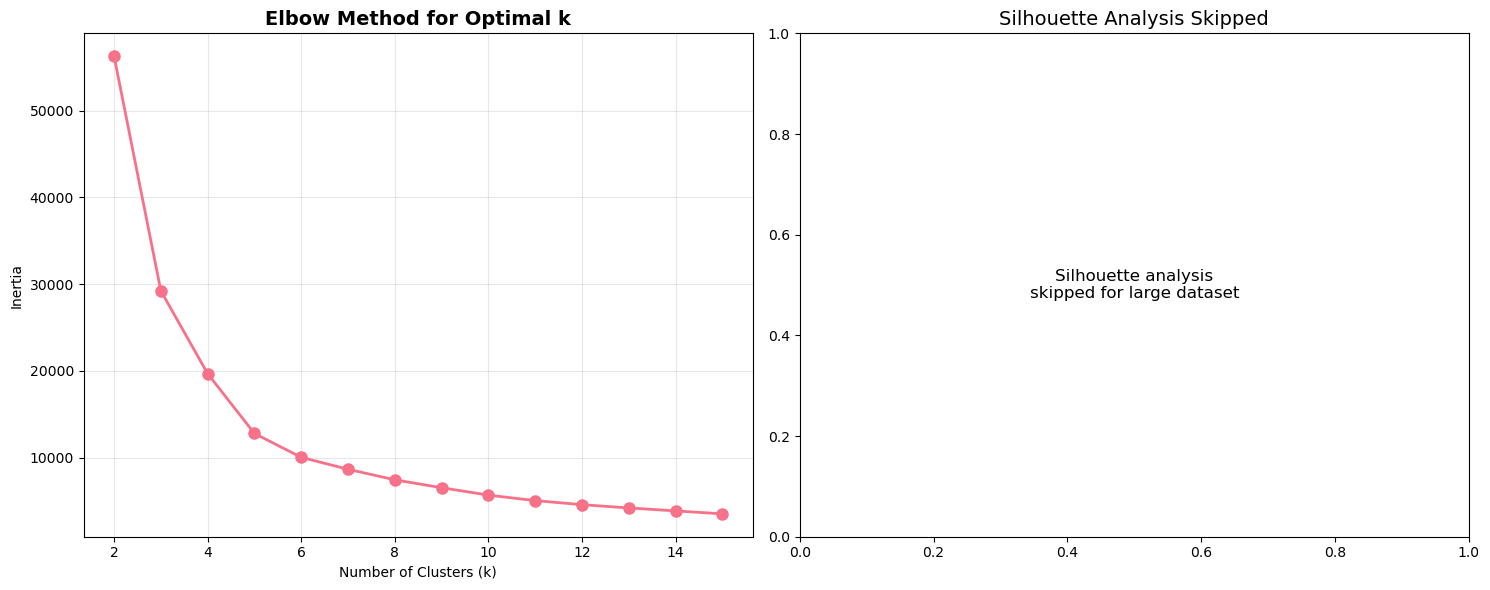


4. APPLYING K-MEANS CLUSTERING (k=10)
----------------------------------------
Clustering completed with 10 clusters
Cluster distribution:
  Cluster 0: 2,999 points (6.0%)
  Cluster 1: 13,368 points (26.7%)
  Cluster 2: 1,074 points (2.1%)
  Cluster 3: 1,437 points (2.9%)
  Cluster 4: 6,534 points (13.1%)
  Cluster 5: 790 points (1.6%)
  Cluster 6: 7,620 points (15.2%)
  Cluster 7: 10,758 points (21.5%)
  Cluster 8: 1,859 points (3.7%)
  Cluster 9: 3,560 points (7.1%)

5. VISUALIZING CLUSTERS
----------------------------------------
Clustering completed with 10 clusters
Cluster distribution:
  Cluster 0: 2,999 points (6.0%)
  Cluster 1: 13,368 points (26.7%)
  Cluster 2: 1,074 points (2.1%)
  Cluster 3: 1,437 points (2.9%)
  Cluster 4: 6,534 points (13.1%)
  Cluster 5: 790 points (1.6%)
  Cluster 6: 7,620 points (15.2%)
  Cluster 7: 10,758 points (21.5%)
  Cluster 8: 1,859 points (3.7%)
  Cluster 9: 3,560 points (7.1%)

5. VISUALIZING CLUSTERS
----------------------------------------


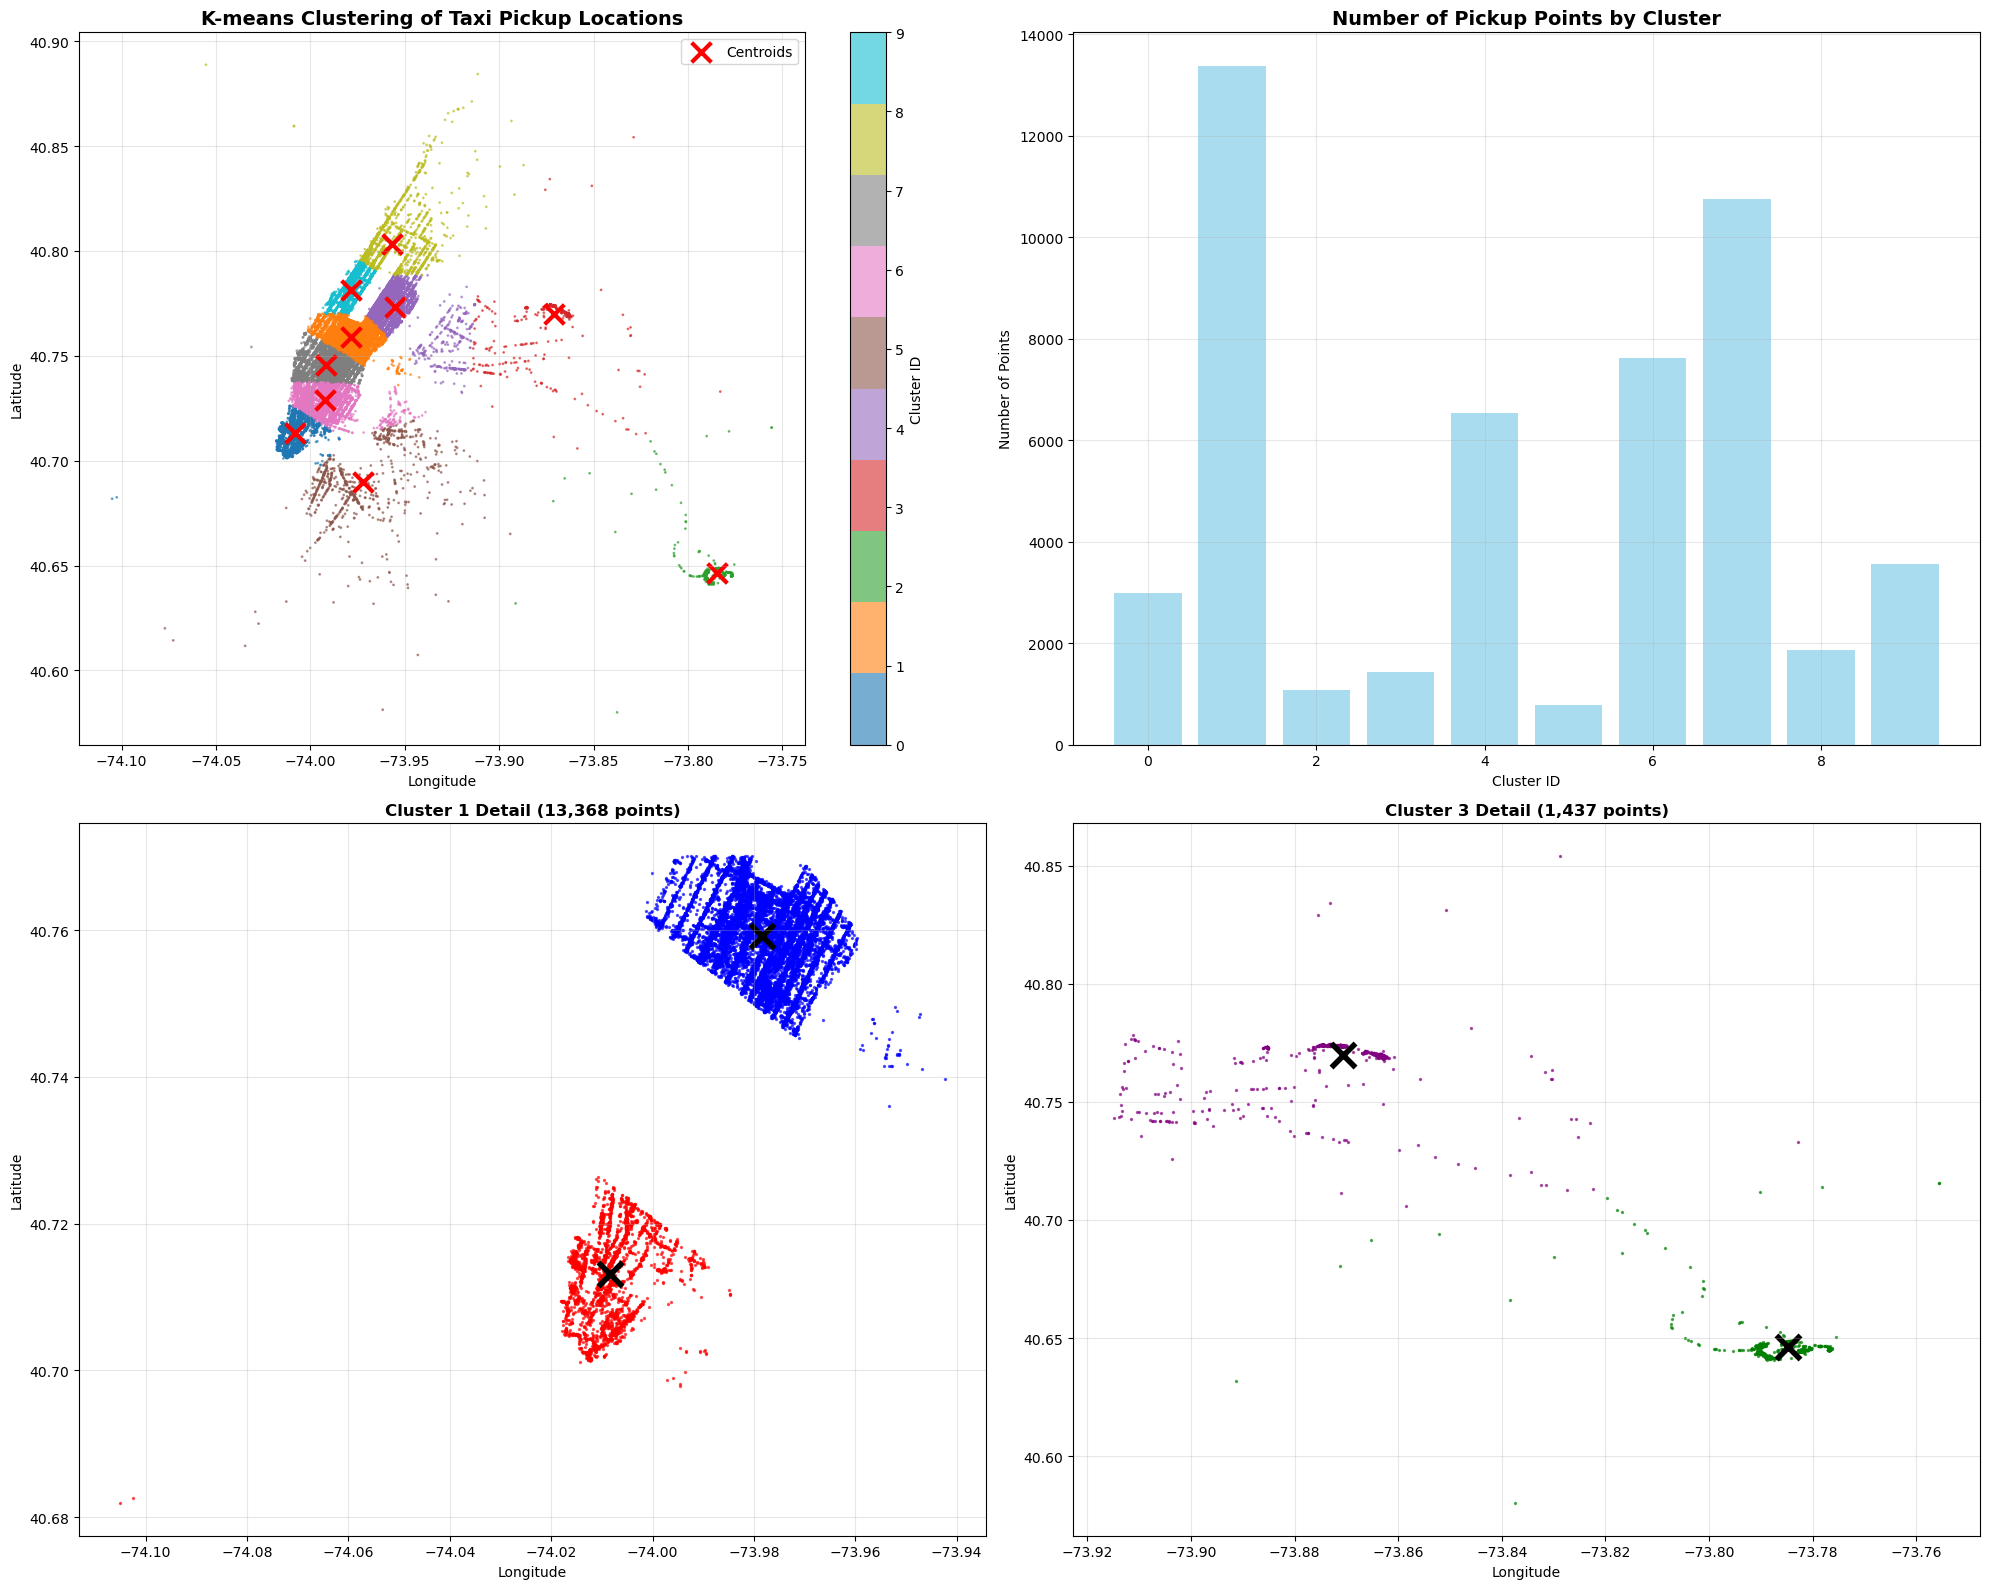


6. CLUSTER CHARACTERISTICS ANALYSIS
----------------------------------------
Analyzing cluster characteristics using 20,000 trips...
Analyzing cluster characteristics using 20,000 trips...
Cluster characteristics:
Cluster characteristics:


,avg_distance,med_distance,std_distance,avg_fare,med_fare,std_fare,mode_hour,avg_passengers,trip_count
cluster,,,,,,,,,
0,3.808,2.955,3.703,15.062,12.5,10.229,19,1.617,1218
1,2.525,1.590,3.014,11.721,9.0,9.556,19,1.645,5287
2,15.996,17.540,5.313,45.763,52.0,13.907,20,1.732,437
3,9.148,9.500,3.249,29.857,30.5,11.144,10,1.710,587
4,2.221,1.560,2.284,10.530,8.5,7.065,9,1.642,2606
5,3.242,2.500,2.790,13.034,11.0,8.182,0,1.679,324
6,2.549,1.800,2.499,11.512,9.5,7.397,23,1.666,3002
7,2.358,1.550,2.640,11.097,9.0,7.881,19,1.648,4358
8,2.538,1.700,2.683,10.966,8.5,8.257,8,1.657,755



High-demand clusters (top 25%): [1, 6, 7]
These clusters account for 12,647 trips

7. CLUSTER GEOGRAPHIC LOCATIONS
----------------------------------------
Cluster geographic approximations:


,cluster_id,longitude,latitude,approximate_area,trip_count
0,0,-74.008322,40.713091,Midtown West / Hell's Kitchen,1218
1,1,-73.978396,40.759168,Upper West Side / Harlem,5287
2,2,-73.784726,40.646254,Lower East Side / Financial District,437
3,3,-73.870701,40.769782,Upper East Side / East Harlem,587
4,4,-73.955271,40.773218,Upper West Side / Harlem,2606
5,5,-73.972022,40.689903,Chelsea / Greenwich Village,324
6,6,-73.992355,40.728921,Midtown West / Hell's Kitchen,3002
7,7,-73.991525,40.745740,Midtown West / Hell's Kitchen,4358
8,8,-73.956547,40.803155,Upper West Side / Harlem,755
9,9,-73.978646,40.781162,Upper West Side / Harlem,1426



✅ Spatial clustering analysis completed!
📍 Identified 10 distinct demand zones
🔥 High-demand clusters: [1, 6, 7]


In [52]:
# Import required libraries for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# K-means Clustering for High-Demand Zones
if 'df_clean' in locals() and df_clean is not None:
    print("SPATIAL CLUSTERING ANALYSIS")
    print("="*50)
    
    # Check for required coordinate columns
    if 'pickup_longitude' in df_clean.columns and 'pickup_latitude' in df_clean.columns:
        
        # 1. Prepare clustering data
        print("1. PREPARING DATA FOR CLUSTERING")
        print("-" * 40)
        
        # Extract coordinates for clustering
        if isinstance(df_clean, dd.DataFrame):
            coordinates = df_clean[['pickup_longitude', 'pickup_latitude']].copy()
            # Remove any remaining NaN values
            coordinates = coordinates.dropna()
            
            # For Dask, compute statistics with proper handling
            total_points = coordinates.shape[0].compute()
            min_lon = coordinates['pickup_longitude'].min().compute()
            max_lon = coordinates['pickup_longitude'].max().compute()
            min_lat = coordinates['pickup_latitude'].min().compute()
            max_lat = coordinates['pickup_latitude'].max().compute()
        else:
            coordinates = df_clean[['pickup_longitude', 'pickup_latitude']].copy()
            # Remove any remaining NaN values
            coordinates = coordinates.dropna()
            
            # For Pandas, direct operations
            total_points = len(coordinates)
            min_lon = coordinates['pickup_longitude'].min()
            max_lon = coordinates['pickup_longitude'].max()
            min_lat = coordinates['pickup_latitude'].min()
            max_lat = coordinates['pickup_latitude'].max()
        
        print(f"Total pickup locations for clustering: {total_points:,}")
        print(f"Longitude range: {min_lon:.4f} to {max_lon:.4f}")
        print(f"Latitude range: {min_lat:.4f} to {max_lat:.4f}")
        
        # Sample data if too large for efficient processing
        max_sample_size = 50000  # Limit for efficient clustering
        if total_points > max_sample_size:
            print(f"Sampling {max_sample_size:,} points for clustering analysis...")
            if isinstance(coordinates, dd.DataFrame):
                # For Dask, use fraction-based sampling
                sample_frac = max_sample_size / total_points
                coordinates_sample = coordinates.sample(frac=sample_frac, random_state=42).compute()
            else:
                # For Pandas, use n-based sampling
                coordinates_sample = coordinates.sample(n=max_sample_size, random_state=42)
        else:
            if isinstance(coordinates, dd.DataFrame):
                coordinates_sample = coordinates.compute()
            else:
                coordinates_sample = coordinates.copy()
        
        sample_points = len(coordinates_sample)
        print(f"Using {sample_points:,} points for clustering")
        
        # 2. Standardize coordinates for clustering
        print(f"\n2. STANDARDIZING COORDINATES")
        print("-" * 40)
        
        scaler = StandardScaler()
        coordinates_scaled = scaler.fit_transform(coordinates_sample)
        
        print("Coordinates standardized for clustering")
        print(f"Scaled coordinate statistics:")
        print(f"  Mean: {coordinates_scaled.mean(axis=0)}")
        print(f"  Std: {coordinates_scaled.std(axis=0)}")
        
        # 3. Determine optimal number of clusters using elbow method
        print(f"\n3. DETERMINING OPTIMAL CLUSTERS")
        print("-" * 40)
        
        # Test different numbers of clusters
        k_range = range(2, 16)
        inertias = []
        silhouette_scores = []
        
        print("Testing different cluster numbers...")
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(coordinates_scaled)
            inertias.append(kmeans.inertia_)
            
            # Calculate silhouette score (skip for very large datasets due to computation time)
            if sample_points <= 25000:
                sil_score = silhouette_score(coordinates_scaled, kmeans.labels_)
                silhouette_scores.append(sil_score)
            
            print(f"  k={k}: inertia={kmeans.inertia_:.2f}")
        
        # Plot elbow curve and silhouette scores
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Elbow curve
        axes[0].plot(k_range, inertias, marker='o', linewidth=2, markersize=8)
        axes[0].set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Number of Clusters (k)')
        axes[0].set_ylabel('Inertia')
        axes[0].grid(True, alpha=0.3)
        
        # Silhouette scores (if calculated)
        if silhouette_scores:
            axes[1].plot(k_range, silhouette_scores, marker='s', linewidth=2, markersize=8, color='orange')
            axes[1].set_title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
            axes[1].set_xlabel('Number of Clusters (k)')
            axes[1].set_ylabel('Silhouette Score')
            axes[1].grid(True, alpha=0.3)
            
            # Find optimal k based on silhouette score
            optimal_k_sil = k_range[np.argmax(silhouette_scores)]
            print(f"Optimal k based on silhouette score: {optimal_k_sil}")
        else:
            axes[1].text(0.5, 0.5, 'Silhouette analysis\nskipped for large dataset', 
                        ha='center', va='center', transform=axes[1].transAxes, fontsize=12)
            axes[1].set_title('Silhouette Analysis Skipped', fontsize=14)
        
        plt.tight_layout()
        plt.show()
        
        # 4. Apply K-means clustering with k=10
        print(f"\n4. APPLYING K-MEANS CLUSTERING (k=10)")
        print("-" * 40)
        
        n_clusters = 10
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(coordinates_scaled)
        
        # Add cluster labels to the sample data
        coordinates_sample = coordinates_sample.copy()
        coordinates_sample['cluster'] = cluster_labels
        
        print(f"Clustering completed with {n_clusters} clusters")
        print(f"Cluster distribution:")
        cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
        for cluster_id, count in cluster_counts.items():
            percentage = (count / sample_points) * 100
            print(f"  Cluster {cluster_id}: {count:,} points ({percentage:.1f}%)")
        
        # 5. Visualize clusters
        print(f"\n5. VISUALIZING CLUSTERS")
        print("-" * 40)
        
        # Create cluster visualization
        fig, axes = plt.subplots(2, 2, figsize=(20, 16))
        
        # 5.1 Main cluster plot
        scatter = axes[0,0].scatter(coordinates_sample['pickup_longitude'], 
                                   coordinates_sample['pickup_latitude'],
                                   c=coordinates_sample['cluster'], 
                                   cmap='tab10', alpha=0.6, s=1)
        
        # Plot cluster centroids
        centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
        axes[0,0].scatter(centroids_original[:, 0], centroids_original[:, 1], 
                         c='red', marker='x', s=200, linewidth=3, label='Centroids')
        
        axes[0,0].set_title('K-means Clustering of Taxi Pickup Locations', fontsize=14, fontweight='bold')
        axes[0,0].set_xlabel('Longitude')
        axes[0,0].set_ylabel('Latitude')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        
        # Add colorbar
        plt.colorbar(scatter, ax=axes[0,0], label='Cluster ID')
        
        # 5.2 Cluster density by area
        axes[0,1].bar(cluster_counts.index, cluster_counts.values, color='skyblue', alpha=0.7)
        axes[0,1].set_title('Number of Pickup Points by Cluster', fontsize=14, fontweight='bold')
        axes[0,1].set_xlabel('Cluster ID')
        axes[0,1].set_ylabel('Number of Points')
        axes[0,1].grid(True, alpha=0.3)
        
        # 5.3 Individual cluster highlights
        n_highlight_clusters = min(4, n_clusters)
        colors = ['red', 'blue', 'green', 'purple']
        
        for i in range(n_highlight_clusters):
            cluster_data = coordinates_sample[coordinates_sample['cluster'] == i]
            if len(cluster_data) > 0:
                axes[1, i//2 if i < 2 else 1].scatter(cluster_data['pickup_longitude'], 
                                                     cluster_data['pickup_latitude'],
                                                     c=colors[i], alpha=0.6, s=2)
                axes[1, i//2 if i < 2 else 1].scatter(centroids_original[i, 0], centroids_original[i, 1], 
                                                     c='black', marker='x', s=300, linewidth=4)
                axes[1, i//2 if i < 2 else 1].set_title(f'Cluster {i} Detail ({len(cluster_data):,} points)', 
                                                       fontsize=12, fontweight='bold')
                axes[1, i//2 if i < 2 else 1].set_xlabel('Longitude')
                axes[1, i//2 if i < 2 else 1].set_ylabel('Latitude')
                axes[1, i//2 if i < 2 else 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # 6. Analyze cluster characteristics
        print(f"\n6. CLUSTER CHARACTERISTICS ANALYSIS")
        print("-" * 40)
        
        # Get full dataset cluster assignments (approximate by finding nearest centroid)
        def assign_to_nearest_cluster(lon, lat, centroids):
            coords_scaled = scaler.transform([[lon, lat]])
            distances = np.sqrt(np.sum((centroids - coords_scaled) ** 2, axis=1))
            return np.argmin(distances)
        
        # Sample a subset for cluster analysis to avoid memory issues
        analysis_sample_size = min(20000, total_points)
        if isinstance(df_clean, dd.DataFrame):
            # For Dask, use fraction-based sampling
            analysis_sample_frac = analysis_sample_size / total_points
            df_analysis = df_clean.sample(frac=analysis_sample_frac, random_state=42).compute()
        else:
            # For Pandas, use n-based sampling
            df_analysis = df_clean.sample(n=analysis_sample_size, random_state=42).copy()
        
        print(f"Analyzing cluster characteristics using {len(df_analysis):,} trips...")
        
        df_analysis['cluster'] = df_analysis.apply(
            lambda row: assign_to_nearest_cluster(row['pickup_longitude'], 
                                                 row['pickup_latitude'], 
                                                 kmeans.cluster_centers_), axis=1)
        
        # Calculate cluster statistics
        cluster_stats = df_analysis.groupby('cluster').agg({
            'trip_distance': ['mean', 'median', 'std'],
            'fare_amount': ['mean', 'median', 'std'],
            'pickup_hour': lambda x: x.mode().iloc[0] if not x.empty else 0,
            'passenger_count': 'mean',
            'pickup_longitude': 'count'  # Trip count
        }).round(3)
        
        cluster_stats.columns = ['avg_distance', 'med_distance', 'std_distance',
                               'avg_fare', 'med_fare', 'std_fare', 
                               'mode_hour', 'avg_passengers', 'trip_count']
        
        print("Cluster characteristics:")
        display(cluster_stats)
        
        # Identify high-demand clusters
        high_demand_threshold = cluster_stats['trip_count'].quantile(0.75)
        high_demand_clusters = cluster_stats[cluster_stats['trip_count'] >= high_demand_threshold].index.tolist()
        
        print(f"\nHigh-demand clusters (top 25%): {high_demand_clusters}")
        print(f"These clusters account for {cluster_stats.loc[high_demand_clusters, 'trip_count'].sum():,} trips")
        
        # Geographic description of clusters (approximate based on coordinates)
        print(f"\n7. CLUSTER GEOGRAPHIC LOCATIONS")
        print("-" * 40)
        
        cluster_locations = []
        for i, centroid in enumerate(centroids_original):
            lon, lat = centroid
            
            # Simple geographic classification (very approximate)
            if lat > 40.75:
                if lon > -73.95:
                    area = "Upper East Side / East Harlem"
                else:
                    area = "Upper West Side / Harlem"
            elif lat > 40.70:
                if lon > -73.95:
                    area = "Midtown East / Murray Hill"
                else:
                    area = "Midtown West / Hell's Kitchen"
            else:
                if lon > -73.95:
                    area = "Lower East Side / Financial District"
                else:
                    area = "Chelsea / Greenwich Village"
            
            cluster_locations.append({
                'cluster_id': i,
                'longitude': lon,
                'latitude': lat,
                'approximate_area': area,
                'trip_count': cluster_stats.loc[i, 'trip_count'] if i in cluster_stats.index else 0
            })
        
        cluster_location_df = pd.DataFrame(cluster_locations)
        print("Cluster geographic approximations:")
        display(cluster_location_df)
        
        print(f"\n✅ Spatial clustering analysis completed!")
        print(f"📍 Identified {n_clusters} distinct demand zones")
        print(f"🔥 High-demand clusters: {high_demand_clusters}")
        
    else:
        print("❌ Cannot perform spatial clustering:")
        print("  - Required coordinate columns (pickup_longitude, pickup_latitude) not found")
        
else:
    print("❌ Cannot perform spatial clustering:")
    print("  - Clean dataset not available. Run preprocessing first.")

## 11. Machine Learning Model for Fare Prediction

Implement a linear regression model to predict taxi fares based on trip characteristics. This model will help understand fare patterns and can be used for dynamic pricing strategies.

MACHINE LEARNING MODEL FOR FARE PREDICTION
✅ All required columns available for modeling

1. PREPARING DATASET FOR MODELING
----------------------------------------
✓ Added feature: trip_duration_minutes
✓ Added feature: speed_mph
✓ Added feature: pickup_weekend
✓ Added feature: morning_rush
✓ Added feature: evening_rush
✓ Added feature: peak_hour
Final feature set: ['trip_distance', 'pickup_hour', 'passenger_count', 'trip_duration_minutes', 'speed_mph', 'pickup_weekend', 'morning_rush', 'evening_rush', 'peak_hour']
Modeling dataset shape: (<dask_expr.expr.Scalar: expr=(DropnaFrame(frame=(Assign(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=Filter(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=Filter(frame=Filter(frame=Filter(frame=Filter(frame=Filter(frame=Filter(frame=Assign(frame=Assign(frame=DropnaFrame(frame=Assign(frame=ReadCSV(8c4681b)), subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_longitude', 'pic

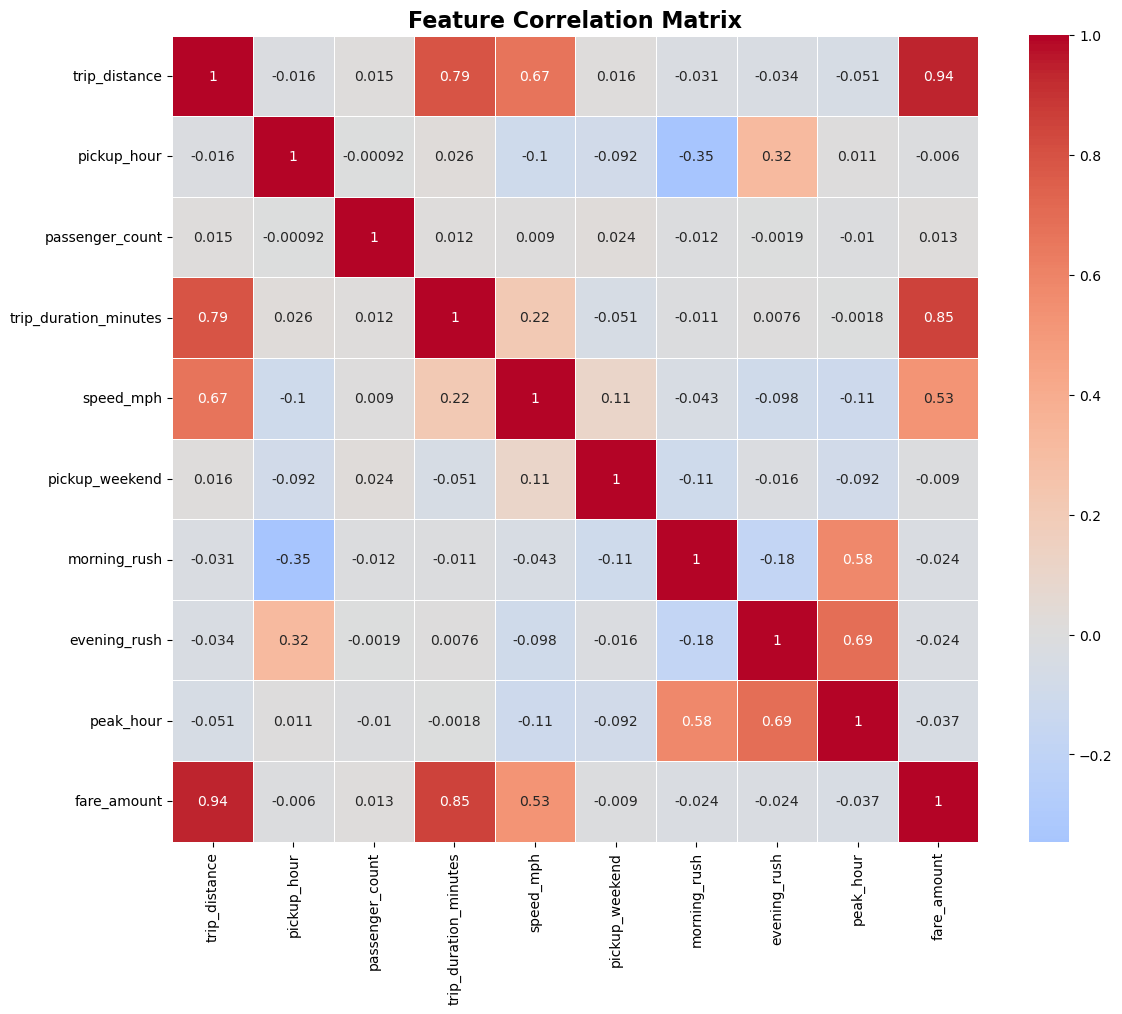

Feature correlations with fare_amount:
  trip_distance: 0.9400
  trip_duration_minutes: 0.8523
  speed_mph: 0.5288
  peak_hour: -0.0374
  evening_rush: -0.0241
  morning_rush: -0.0239
  passenger_count: 0.0130
  pickup_weekend: -0.0090
  pickup_hour: -0.0060

3. FEATURE ENGINEERING
----------------------------------------
✓ Added: trip_distance_squared
✓ Added: distance_hour_interaction
✓ Added: peak_distance_premium
Final features for modeling: ['trip_distance', 'pickup_hour', 'passenger_count', 'trip_duration_minutes', 'speed_mph', 'pickup_weekend', 'morning_rush', 'evening_rush', 'peak_hour', 'trip_distance_squared', 'distance_hour_interaction', 'peak_distance_premium']

4. PREPARING TRAIN/TEST SPLIT
----------------------------------------
Feature matrix shape: (11930635, 12)
Target vector shape: (11930635,)
Converting Dask DataFrame to Pandas for train_test_split...
Feature matrix shape: (11930635, 12)
Target vector shape: (11930635,)
Converting Dask DataFrame to Pandas for train_

,Feature,Coefficient,Abs_Coefficient
8,peak_hour,3.917769e+09,3.917769e+09
7,evening_rush,-3.245893e+09,3.245893e+09
6,morning_rush,-2.866511e+09,2.866511e+09
0,trip_distance,7.915001e+00,7.915001e+00
3,trip_duration_minutes,2.838644e+00,2.838644e+00
10,distance_hour_interaction,-1.951504e-01,1.951504e-01
9,trip_distance_squared,1.558497e-01,1.558497e-01
11,peak_distance_premium,-1.552874e-01,1.552874e-01
4,speed_mph,-1.530409e-01,1.530409e-01
1,pickup_hour,5.907532e-02,5.907532e-02



7. MODEL EVALUATION
----------------------------------------
Model Performance Metrics:
Model Performance Metrics:


,Metric,Training,Test
0,MSE,7.0021,6.7328
1,RMSE,2.6461,2.5948
2,MAE,0.6996,0.6986
3,R²,0.9361,0.9385



Model Interpretation:
• Training R²: 0.9361 (93.61% variance explained)
• Test R²: 0.9385 (93.85% variance explained)
• Test RMSE: $2.59 (average prediction error)
• Test MAE: $0.70 (median prediction error)
✅ Good generalization (R² difference: -0.0023)

8. CREATING VISUALIZATIONS
----------------------------------------


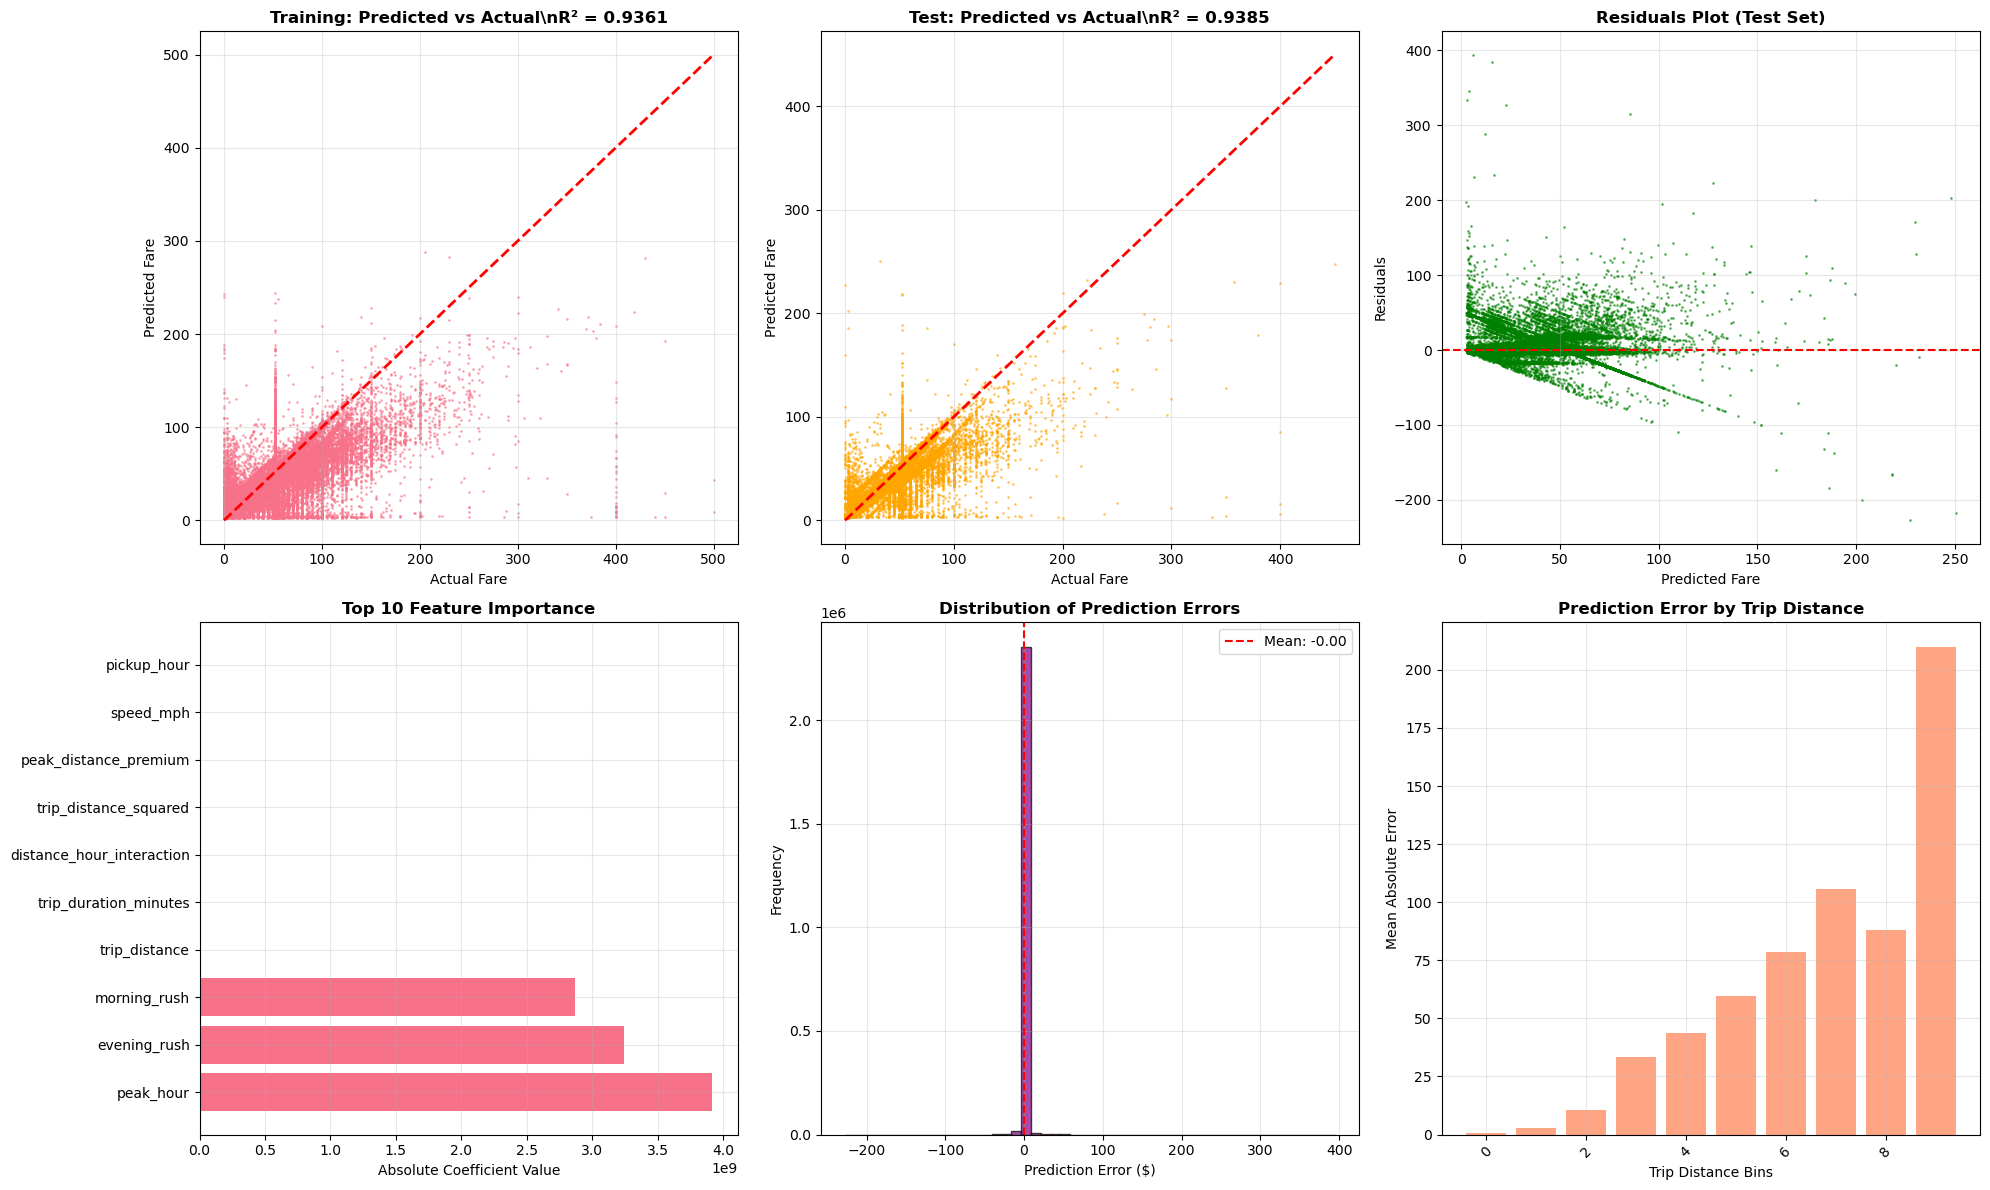


9. SAMPLE PREDICTIONS
----------------------------------------
Sample predictions:


,Actual_Fare,Predicted_Fare,Error,Trip_Distance,Pickup_Hour
0,9.5,9.79,0.29,1.92,7
1,30.5,29.85,0.65,9.80,18
2,10.5,9.56,0.94,1.29,12
3,21.5,22.46,0.96,6.60,18
4,14.0,13.94,0.06,2.90,23
5,3.5,3.64,0.14,0.20,23
6,5.0,5.59,0.59,1.04,8
7,11.0,10.90,0.10,2.39,19
8,5.5,5.69,0.19,0.70,10
9,13.5,13.70,0.20,3.80,10



10. MODEL SUMMARY
📊 Model Type: Linear Regression
📈 Features Used: 12
🎯 Target Variable: fare_amount
📉 Test R²: 0.9385 (93.85% variance explained)
💰 Test RMSE: $2.59
🔍 Most Important Feature: peak_hour

💡 BUSINESS INSIGHTS:
• The model explains 93.8% of fare variation
• Average prediction error: $0.70
• Most predictive factors: peak_hour, evening_rush, morning_rush
✅ Excellent model performance for fare prediction

✅ Machine learning analysis completed!


In [54]:
# Import required libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Machine Learning Model for Fare Prediction
if 'df_clean' in locals() and df_clean is not None:
    print("MACHINE LEARNING MODEL FOR FARE PREDICTION")
    print("="*60)
    
    # Check for required columns
    required_features = ['trip_distance', 'pickup_hour', 'passenger_count']
    target_column = 'fare_amount'
    
    available_features = [col for col in required_features if col in df_clean.columns]
    missing_features = [col for col in required_features if col not in df_clean.columns]
    
    if target_column not in df_clean.columns:
        print(f"❌ Target column '{target_column}' not found")
    elif missing_features:
        print(f"❌ Missing required features: {missing_features}")
    else:
        print("✅ All required columns available for modeling")
        
        # 1. Prepare the dataset for modeling
        print(f"\n1. PREPARING DATASET FOR MODELING")
        print("-" * 40)
        
        # Start with basic features
        feature_columns = available_features.copy()
        
        # Add additional features if available
        additional_features = ['trip_duration_minutes', 'speed_mph', 'pickup_weekend', 
                              'morning_rush', 'evening_rush', 'peak_hour']
        
        for feature in additional_features:
            if feature in df_clean.columns:
                feature_columns.append(feature)
                print(f"✓ Added feature: {feature}")
        
        print(f"Final feature set: {feature_columns}")
        
        # Create modeling dataset
        modeling_data = df_clean[feature_columns + [target_column]].copy()
        
        # Remove any remaining missing values
        modeling_data = modeling_data.dropna()
        
        print(f"Modeling dataset shape: {modeling_data.shape}")
        print(f"Features: {len(feature_columns)}")
        
        # 2. Exploratory Data Analysis for Features
        print(f"\n2. FEATURE ANALYSIS")
        print("-" * 40)
        
        # For Dask DataFrames, we need to compute before correlation analysis
        if isinstance(modeling_data, dd.DataFrame):
            # Sample for correlation analysis to avoid memory issues
            sample_size = min(100000, modeling_data.shape[0].compute())
            sample_frac = sample_size / modeling_data.shape[0].compute()
            modeling_sample = modeling_data.sample(frac=sample_frac, random_state=42).compute()
            correlation_matrix = modeling_sample.corr()
        else:
            correlation_matrix = modeling_data.corr()
        
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                   square=True, linewidths=0.5)
        plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        # Feature-target correlations (now working with computed correlation matrix)
        target_correlations = correlation_matrix[target_column].copy()
        # Remove the target column from correlations
        if target_column in target_correlations.index:
            target_correlations = target_correlations.drop(target_column)
        target_correlations = target_correlations.reindex(target_correlations.abs().sort_values(ascending=False).index)
        
        print("Feature correlations with fare_amount:")
        for feature, corr in target_correlations.items():
            print(f"  {feature}: {corr:.4f}")
        
        # 3. Feature Engineering and Preparation
        print(f"\n3. FEATURE ENGINEERING")
        print("-" * 40)
        
        # Create polynomial features for trip_distance (squared term)
        if 'trip_distance' in modeling_data.columns:
            modeling_data['trip_distance_squared'] = modeling_data['trip_distance'] ** 2
            feature_columns.append('trip_distance_squared')
            print("✓ Added: trip_distance_squared")
        
        # Create interaction features
        if 'trip_distance' in modeling_data.columns and 'pickup_hour' in modeling_data.columns:
            modeling_data['distance_hour_interaction'] = (modeling_data['trip_distance'] * 
                                                         modeling_data['pickup_hour'])
            feature_columns.append('distance_hour_interaction')
            print("✓ Added: distance_hour_interaction")
        
        # Peak hour premium feature
        if 'peak_hour' in modeling_data.columns and 'trip_distance' in modeling_data.columns:
            modeling_data['peak_distance_premium'] = (modeling_data['peak_hour'] * 
                                                     modeling_data['trip_distance'])
            feature_columns.append('peak_distance_premium')
            print("✓ Added: peak_distance_premium")
        
        print(f"Final features for modeling: {feature_columns}")
        
        # 4. Prepare features and target
        print(f"\n4. PREPARING TRAIN/TEST SPLIT")
        print("-" * 40)
        
        X = modeling_data[feature_columns]
        y = modeling_data[target_column]
        
        # Handle shape for both Dask and Pandas DataFrames
        if isinstance(X, dd.DataFrame):
            X_shape = (X.shape[0].compute(), X.shape[1])
            y_shape = (y.shape[0].compute(),)
            print(f"Feature matrix shape: {X_shape}")
            print(f"Target vector shape: {y_shape}")
            
            # For Dask DataFrames, compute to Pandas for train_test_split
            print("Converting Dask DataFrame to Pandas for train_test_split...")
            X_computed = X.compute()
            y_computed = y.compute()
        else:
            X_computed = X
            y_computed = y
            print(f"Feature matrix shape: {X.shape}")
            print(f"Target vector shape: {y.shape}")
        
        # Split the data
        test_size = 0.2
        random_state = 42
        
        X_train, X_test, y_train, y_test = train_test_split(
            X_computed, y_computed, test_size=test_size, random_state=random_state
        )
        
        print(f"Training set: {X_train.shape[0]:,} samples")
        print(f"Test set: {X_test.shape[0]:,} samples")
        print(f"Train/test split ratio: {(1-test_size)*100:.0f}/{test_size*100:.0f}")
        
        # 5. Feature Scaling
        print(f"\n5. FEATURE SCALING")
        print("-" * 40)
        
        # Standardize features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        print("✓ Features standardized")
        print(f"Training features - Mean: {X_train_scaled.mean():.4f}, Std: {X_train_scaled.std():.4f}")
        
        # 6. Train Linear Regression Model
        print(f"\n6. TRAINING LINEAR REGRESSION MODEL")
        print("-" * 40)
        
        # Initialize and train the model
        lr_model = LinearRegression()
        lr_model.fit(X_train_scaled, y_train)
        
        print("✓ Linear regression model trained")
        
        # Model coefficients
        coefficients = pd.DataFrame({
            'Feature': feature_columns,
            'Coefficient': lr_model.coef_,
            'Abs_Coefficient': np.abs(lr_model.coef_)
        }).sort_values('Abs_Coefficient', ascending=False)
        
        print(f"Model intercept: {lr_model.intercept_:.4f}")
        print("\nFeature coefficients (sorted by absolute value):")
        display(coefficients)
        
        # 7. Make Predictions and Evaluate
        print(f"\n7. MODEL EVALUATION")
        print("-" * 40)
        
        # Make predictions
        y_train_pred = lr_model.predict(X_train_scaled)
        y_test_pred = lr_model.predict(X_test_scaled)
        
        # Calculate metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_rmse = np.sqrt(train_mse)
        test_rmse = np.sqrt(test_mse)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Performance summary
        performance_metrics = {
            'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
            'Training': [train_mse, train_rmse, train_mae, train_r2],
            'Test': [test_mse, test_rmse, test_mae, test_r2]
        }
        
        performance_df = pd.DataFrame(performance_metrics)
        
        print("Model Performance Metrics:")
        display(performance_df.round(4))
        
        # Model interpretation
        print(f"\nModel Interpretation:")
        print(f"• Training R²: {train_r2:.4f} ({train_r2*100:.2f}% variance explained)")
        print(f"• Test R²: {test_r2:.4f} ({test_r2*100:.2f}% variance explained)")
        print(f"• Test RMSE: ${test_rmse:.2f} (average prediction error)")
        print(f"• Test MAE: ${test_mae:.2f} (median prediction error)")
        
        # Check for overfitting
        r2_diff = train_r2 - test_r2
        if r2_diff > 0.05:
            print(f"⚠️ Potential overfitting detected (R² difference: {r2_diff:.4f})")
        else:
            print(f"✅ Good generalization (R² difference: {r2_diff:.4f})")
        
        # 8. Visualize Results
        print(f"\n8. CREATING VISUALIZATIONS")
        print("-" * 40)
        
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        
        # 8.1 Predicted vs Actual (Training)
        axes[0,0].scatter(y_train, y_train_pred, alpha=0.5, s=1)
        axes[0,0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
                      'r--', linewidth=2)
        axes[0,0].set_xlabel('Actual Fare')
        axes[0,0].set_ylabel('Predicted Fare')
        axes[0,0].set_title(f'Training: Predicted vs Actual\\nR² = {train_r2:.4f}', 
                           fontweight='bold')
        axes[0,0].grid(True, alpha=0.3)
        
        # 8.2 Predicted vs Actual (Test)
        axes[0,1].scatter(y_test, y_test_pred, alpha=0.5, s=1, color='orange')
        axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                      'r--', linewidth=2)
        axes[0,1].set_xlabel('Actual Fare')
        axes[0,1].set_ylabel('Predicted Fare')
        axes[0,1].set_title(f'Test: Predicted vs Actual\\nR² = {test_r2:.4f}', 
                           fontweight='bold')
        axes[0,1].grid(True, alpha=0.3)
        
        # 8.3 Residuals plot (Test)
        residuals = y_test - y_test_pred
        axes[0,2].scatter(y_test_pred, residuals, alpha=0.5, s=1, color='green')
        axes[0,2].axhline(y=0, color='r', linestyle='--')
        axes[0,2].set_xlabel('Predicted Fare')
        axes[0,2].set_ylabel('Residuals')
        axes[0,2].set_title('Residuals Plot (Test Set)', fontweight='bold')
        axes[0,2].grid(True, alpha=0.3)
        
        # 8.4 Feature importance
        feature_importance = coefficients.head(10)  # Top 10 features
        axes[1,0].barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'])
        axes[1,0].set_xlabel('Absolute Coefficient Value')
        axes[1,0].set_title('Top 10 Feature Importance', fontweight='bold')
        axes[1,0].grid(True, alpha=0.3)
        
        # 8.5 Prediction error distribution
        axes[1,1].hist(residuals, bins=50, alpha=0.7, color='purple', edgecolor='black')
        axes[1,1].axvline(residuals.mean(), color='red', linestyle='--', 
                         label=f'Mean: {residuals.mean():.2f}')
        axes[1,1].set_xlabel('Prediction Error ($)')
        axes[1,1].set_ylabel('Frequency')
        axes[1,1].set_title('Distribution of Prediction Errors', fontweight='bold')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)
        
        # 8.6 Model performance by trip distance
        if 'trip_distance' in X_test.columns:
            distance_bins = pd.cut(X_test['trip_distance'], bins=10)
            binned_performance = pd.DataFrame({
                'distance_bin': distance_bins,
                'actual': y_test,
                'predicted': y_test_pred,
                'error': np.abs(residuals)
            }).groupby('distance_bin').agg({
                'actual': 'mean',
                'predicted': 'mean', 
                'error': 'mean'
            })
            
            x_pos = range(len(binned_performance))
            axes[1,2].bar(x_pos, binned_performance['error'], alpha=0.7, color='coral')
            axes[1,2].set_xlabel('Trip Distance Bins')
            axes[1,2].set_ylabel('Mean Absolute Error')
            axes[1,2].set_title('Prediction Error by Trip Distance', fontweight='bold')
            axes[1,2].tick_params(axis='x', rotation=45)
            axes[1,2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # 9. Sample Predictions
        print(f"\n9. SAMPLE PREDICTIONS")
        print("-" * 40)
        
        # Show some example predictions
        sample_indices = np.random.choice(len(X_test), size=10, replace=False)
        sample_predictions = pd.DataFrame({
            'Actual_Fare': y_test.iloc[sample_indices].values,
            'Predicted_Fare': y_test_pred[sample_indices],
            'Error': np.abs(y_test.iloc[sample_indices].values - y_test_pred[sample_indices]),
            'Trip_Distance': X_test['trip_distance'].iloc[sample_indices].values if 'trip_distance' in X_test.columns else 'N/A',
            'Pickup_Hour': X_test['pickup_hour'].iloc[sample_indices].values if 'pickup_hour' in X_test.columns else 'N/A'
        })
        
        print("Sample predictions:")
        display(sample_predictions.round(2))
        
        # 10. Model Summary
        print(f"\n10. MODEL SUMMARY")
        print("="*50)
        
        print(f"📊 Model Type: Linear Regression")
        print(f"📈 Features Used: {len(feature_columns)}")
        print(f"🎯 Target Variable: {target_column}")
        print(f"📉 Test R²: {test_r2:.4f} ({test_r2*100:.2f}% variance explained)")
        print(f"💰 Test RMSE: ${test_rmse:.2f}")
        print(f"🔍 Most Important Feature: {coefficients.iloc[0]['Feature']}")
        
        # Business insights
        print(f"\n💡 BUSINESS INSIGHTS:")
        print(f"• The model explains {test_r2*100:.1f}% of fare variation")
        print(f"• Average prediction error: ${test_mae:.2f}")
        print(f"• Most predictive factors: {', '.join(coefficients.head(3)['Feature'].tolist())}")
        
        if test_r2 > 0.8:
            print(f"✅ Excellent model performance for fare prediction")
        elif test_r2 > 0.6:
            print(f"✅ Good model performance for fare prediction")
        elif test_r2 > 0.4:
            print(f"⚠️ Moderate model performance - consider feature engineering")
        else:
            print(f"❌ Poor model performance - significant improvements needed")
        
        print(f"\n✅ Machine learning analysis completed!")
        
else:
    print("❌ Cannot perform machine learning analysis:")
    print("  - Clean dataset not available. Run preprocessing first.")